<center>
    COMP4600/5300 - Reinforcement Learning

# Homework 5 - Temporal Difference

### Due: Wednesday, October 14th 11:59 pm
    
</center>

Student Name: ______________________ 

The purpose of this project is to study different properties of Temporal Difference methods.  

In [1]:
# You are allowed to use the following modules
import numpy as np
import matplotlib.pyplot as plt


## Part I
The following Windy Gridworld includes a crosswind running upward through the middle of the grid. The strength of wind is shown under each column that you should use for shifting. The goal is to reach the goal state G from the start state S. This is an undiscounted episodic task, with constant rewards of -1 until the goal state is reached.
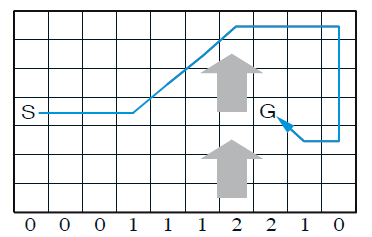


## Part I
Implement SARSA (on-policy TD control) using $\varepsilon$–greedy policy with parameters $\varepsilon=0.1, \alpha=0.5$, and $Q_0 (s,a)=0$ for all $s,a$. Apply your implementation to the windy gridworld in the following scenarios:


**(a)** In this scenario, the agent’s action set includes four moves (i.e. Up, Down, Right, Left). Plot the number of episodes vs. time steps (similar to graph in page 130). Then calculate the average episode length. 

**(b)** In this scenario, the agent has access to King’s moves (eight actions). You need to define a new action set and re-run the experiment in previous scenario. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(c)** In this scenario, you need to add a ninth action that causes no movement at all other than that caused by the wind. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**(d)** In this scenario, the agent has access to King’s moves (eight actions). Assume that the effect of the wind, if there is any, is stochastic, sometimes varying by 1 from the mean values given for each column. That is, a third of the time you move exactly according to these values, as in the previous part, but also a third of the time you move one cell above that, and another third of the time you move one cell below that. For example, if you are one cell above the goal, one-third of the time you move two cells above the goal, and one-third of the time you move to the goal. Plot the number of episodes vs. time steps. Then calculate the average episode length.

**Note:** all four plots should be shown in one figure for comparison.



In [2]:
def my_argmax(array):
    """
    return argmax and break ties
    """
    max_ = np.nanmax(array)
    indx = [i for i in range(len(array)) if array[i] == max_]
    return np.random.choice(indx)

In [157]:
def wind_det(s):
    """
    return deterministic wind vector
    """
    wind = np.zeros(2, dtype=np.int)
    col = s[1]
    if 2 < col < 9:
        wind[0] -= 1
        if col in (6, 7):
            wind[0] -= 1
    return wind


def mask_actions_4(Q):
    """
    put nan in indeces of unallowed actions. this way my_argmax does not consider them 
    """
    for i in range(ROWS):
        for j in range(COLS):
            if i == 0:
                Q[1, i, j] = np.nan
            elif i == S.shape[0] - 1:
                Q[3, i, j] = np.nan
            if j == 0:
                Q[2, i, j] = np.nan
            elif j == S.shape[1] - 1:
                Q[0, i, j] = np.nan
    return Q


def transition(s, a):
    """
    transition function
    """
    s_p = s + a + wind_det(s)
    terminal = np.all(s_p == ST)
    reward = -1 * (1 - terminal)   
    reward = -1
    s_p[0] = max(s_p[0], 0)  # stick at border
    return reward, s_p, terminal


def get_e_greedy_action(Q, s, eps=0.1):
    """
    get action with e-greedy policy
    """
    explore = np.random.choice((True, False), p=(1 - eps, eps))
    if explore:
        indecis = np.where(~np.isnan(Q[:, s[0], s[1]]))[0]
        return np.random.choice(indecis)
    return my_argmax(Q[:, s[0], s[1]])


In [163]:
# Your code here
ROWS = 7
COLS = 10

S = np.zeros((ROWS, COLS), dtype=np.int)
S0 = np.array((3, 0), dtype=np.int)
ST = np.array((3, 7), dtype=np.int)


def sarsa(Q, A, k=180, eps=0.1):
    a_count = np.zeros_like(Q)  # count number of times an action was taken
    epi_per_t = []
    for episode in range(k):
        s = S0
        a = get_e_greedy_action(Q, s, eps=0.1)

        while True:
            
            r, s_p, terminal = transition(s, A[a])
            a_p = get_e_greedy_action(Q, s_p, eps=eps)

            a_count[a, s[0], s[1]] += 1
            alpha = 1 / a_count[a, s[0], s[1]]
            print(alpha)
            Q[a, s[0], s[1]] = Q[a, s[0], s[1]] + \
                                alpha * (r + Q[a_p, s_p[0], s_p[1]] - Q[a, s[0], s[1]])
                
            s, a = s_p, a_p
            
            epi_per_t.append(episode)
            if terminal:
                break

    return Q, epi_per_t
        

In [ ]:
A4 = np.array(((0, 1), (-1, 0), (0, -1), (1, 0)), dtype=np.int)
Q4 = np.zeros((4, ROWS, COLS))
Q4 = mask_actions_4(Q4)
Q, epi_per_t = sarsa(Q4, A4, k=170, eps=0.1)
plt.plot(epi_per_t)

1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
0.5
1.0
1.0
0.5
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.3333333333333333
0.5
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
0.5
1.0
1.0
1.0
0.5
0.25
0.3333333333333333
1.0
1.0
0.5
0.3333333333333333
0.5
0.5
0.2
0.5
0.5
1.0
0.5
0.3333333333333333
0.5
0.5
0.16666666666666666
0.3333333333333333
0.3333333333333333
0.5
0.3333333333333333
1.0
0.5
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
0.5
0.5
0.3333333333333333
1.0
1.0
0.5
0.5
0.25
0.3333333333333333
0.25
0.3333333333333333
0.3333333333333333
0.5
1.0
1.0
1.0
1.0
1.0
1.0
0.5
1.0
1.0
0.5
0.5
0.5
0.5
0.5
0.3333333333333333
0.3333333333333333
0.3333333333333333
0.5
0.3333333333333333
0.25
0.5
1.0
1.0
1.0
1.0
1.0
0.5
1.0
0.5
1.0
1.0
0.5
0.5
0.5
0.3333333333333333
0.25
0.5
0.5
0.3333333333333333
0.2
0.3333333333333333
0.3333333333333333
0.25
0.25
0.2
0.16666666666666666
0.2
0.16666666666666666
0.16666666666666666
0.25

0.018518518518518517
0.025
0.022222222222222223
0.02631578947368421
0.018518518518518517
0.022222222222222223
0.01818181818181818
0.03125
0.05
0.1111111111111111
0.25
0.3333333333333333
0.02564102564102564
0.025
0.01818181818181818
0.017857142857142856
0.024390243902439025
0.017543859649122806
0.023809523809523808
0.021739130434782608
0.030303030303030304
0.01818181818181818
0.02857142857142857
0.017857142857142856
0.021739130434782608
0.017241379310344827
0.023255813953488372
0.01694915254237288
0.022727272727272728
0.02127659574468085
0.029411764705882353
0.017857142857142856
0.017543859649122806
0.017241379310344827
0.027777777777777776
0.024390243902439025
0.017543859649122806
0.020833333333333332
0.023809523809523808
0.017241379310344827
0.016666666666666666
0.030303030303030304
0.09090909090909091
0.022222222222222223
0.02127659574468085
0.02040816326530612
0.023255813953488372
0.01694915254237288
0.02
0.016666666666666666
0.01639344262295082
0.021739130434782608
0.02083333333333

0.04
0.1
0.038461538461538464
0.08333333333333333
0.16666666666666666
0.09090909090909091
0.2
0.3333333333333333
0.013333333333333334
0.023809523809523808
0.06666666666666667
0.25
0.125
0.023255813953488372
0.037037037037037035
0.08333333333333333
0.25
0.0625
0.2
0.014925373134328358
0.014084507042253521
0.0125
0.013157894736842105
0.022727272727272728
0.058823529411764705
0.2
0.1111111111111111
0.022222222222222223
0.05555555555555555
0.16666666666666666
0.1
0.021739130434782608
0.06666666666666667
0.01818181818181818
0.012987012987012988
0.02127659574468085
0.05263157894736842
0.14285714285714285
0.16666666666666666
0.01282051282051282
0.017857142857142856
0.017857142857142856
0.012658227848101266
0.017543859649122806
0.017543859649122806
0.014705882352941176
0.015384615384615385
0.014925373134328358
0.012345679012345678
0.0125
0.020833333333333332
0.0625
0.02040816326530612
0.058823529411764705
0.017241379310344827
0.012345679012345678
0.02
0.03571428571428571
0.09090909090909091
0.

0.022727272727272728
0.009523809523809525
0.022222222222222223
0.010638297872340425
0.009433962264150943
0.01
0.007936507936507936
0.007407407407407408
0.009433962264150943
0.01639344262295082
0.03571428571428571
0.1
0.016129032258064516
0.041666666666666664
0.021739130434782608
0.009345794392523364
0.02127659574468085
0.009259259259259259
0.015873015873015872
0.04
0.015625
0.04
0.1111111111111111
0.3333333333333333
0.3333333333333333
1.0
0.007352941176470588
0.009174311926605505
0.020833333333333332
0.00909090909090909
0.030303030303030304
0.047619047619047616
0.010526315789473684
0.009345794392523364
0.007874015748031496
0.009615384615384616
0.009523809523809525
0.009433962264150943
0.009345794392523364
0.009259259259259259
0.009174311926605505
0.0072992700729927005
0.010416666666666666
0.009259259259259259
0.0078125
0.009174311926605505
0.009900990099009901
0.00980392156862745
0.009708737864077669
0.010638297872340425
0.010309278350515464
0.010526315789473684
0.00847457627118644
0.0

0.02040816326530612
0.0196078431372549
0.034482758620689655
0.021739130434782608
0.02
0.019230769230769232
0.03333333333333333
0.02127659574468085
0.018867924528301886
0.013888888888888888
0.014285714285714285
0.043478260869565216
0.03571428571428571
0.0196078431372549
0.05
0.034482758620689655
0.03225806451612903
0.018867924528301886
0.034482758620689655
0.023809523809523808
0.018518518518518517
0.016129032258064516
0.023255813953488372
0.015873015873015872
0.017857142857142856
0.018518518518518517
0.021739130434782608
0.02631578947368421
0.024390243902439025
0.07142857142857142
0.029411764705882353
0.043478260869565216
0.08333333333333333
0.02857142857142857
0.041666666666666664
0.03333333333333333
0.019230769230769232
0.03571428571428571
0.018867924528301886
0.023809523809523808
0.06666666666666667
0.02857142857142857
0.03571428571428571
0.045454545454545456
0.022727272727272728
0.010309278350515464
0.007142857142857143
0.005128205128205128
0.005154639175257732
0.009523809523809525


0.005494505494505495
0.00546448087431694
0.005747126436781609
0.004878048780487805
0.006622516556291391
0.005025125628140704
0.0040650406504065045
0.005847953216374269
0.004048582995951417
0.005813953488372093
0.004032258064516129
0.00510204081632653
0.008849557522123894
0.02127659574468085
0.045454545454545456
0.08333333333333333
0.2
0.125
0.5
0.043478260869565216
0.07692307692307693
0.25
0.5
0.2
0.3333333333333333
0.16666666666666666
0.3333333333333333
0.5
1.0
0.14285714285714285
0.125
0.05263157894736842
0.004016064257028112
0.005780346820809248
0.004
0.005076142131979695
0.016666666666666666
0.027777777777777776
0.005050505050505051
0.011627906976744186
0.005025125628140704
0.008771929824561403
0.023255813953488372
0.008695652173913044
0.020833333333333332
0.041666666666666664
0.07142857142857142
0.16666666666666666
0.25
0.14285714285714285
0.25
0.005
0.005714285714285714
0.00398406374501992
0.005
0.008620689655172414
0.02040816326530612
0.04
0.05263157894736842
0.2
0.0049751243781

0.003968253968253968
0.004608294930875576
0.004405286343612335
0.004608294930875576
0.0045871559633027525
0.0045871559633027525
0.005434782608695652
0.004
0.004424778761061947
0.004830917874396135
0.005714285714285714
0.0045662100456621
0.004807692307692308
0.0037313432835820895
0.0036101083032490976
0.006711409395973154
0.011111111111111112
0.01282051282051282
0.0196078431372549
0.012658227848101266
0.013513513513513514
0.021739130434782608
0.015384615384615385
0.013333333333333334
0.011494252873563218
0.030303030303030304
0.005154639175257732
0.005405405405405406
0.0045662100456621
0.003952569169960474
0.005405405405405406
0.005681818181818182
0.005376344086021506
0.00398406374501992
0.003105590062111801
0.004219409282700422
0.010101010101010102
0.004201680672268907
0.01
0.0041841004184100415
0.013157894736842105
0.023255813953488372
0.004424778761061947
0.004807692307692308
0.003968253968253968
0.0030959752321981426
0.004405286343612335
0.004784688995215311
0.003952569169960474
0.00

0.004524886877828055
0.011627906976744186
0.0045045045045045045
0.01020408163265306
0.01639344262295082
0.013888888888888888
0.014285714285714285
0.018867924528301886
0.01639344262295082
0.045454545454545456
0.003003003003003003
0.005917159763313609
0.0029940119760479044
0.004484304932735426
0.010101010101010102
0.016129032258064516
0.018518518518518517
0.01639344262295082
0.01818181818181818
0.0125
0.02040816326530612
0.03333333333333333
0.03125
0.016129032258064516
0.02702702702702703
0.07142857142857142
0.016129032258064516
0.03225806451612903
0.01
0.014084507042253521
0.024390243902439025
0.03333333333333333
0.058823529411764705
0.125
0.034482758620689655
0.07142857142857142
0.0029850746268656717
0.005494505494505495
0.009174311926605505
0.010416666666666666
0.012195121951219513
0.009433962264150943
0.008928571428571428
0.00546448087431694
0.007194244604316547
0.007633587786259542
0.017857142857142856
0.012345679012345678
0.015625
0.01282051282051282
0.019230769230769232
0.03125
0.

0.0034482758620689655
0.0033112582781456954
0.0033003300330033004
0.003289473684210526
0.003278688524590164
0.003389830508474576
0.0028011204481792717
0.0032679738562091504
0.0033783783783783786
0.002793296089385475
0.002347417840375587
0.003215434083601286
0.009708737864077669
0.038461538461538464
0.002785515320334262
0.003367003367003367
0.0038022813688212928
0.0038461538461538464
0.002932551319648094
0.0036363636363636364
0.0038314176245210726
0.0034602076124567475
0.0037174721189591076
0.0028653295128939827
0.0027397260273972603
0.0051813471502590676
0.00847457627118644
0.009900990099009901
0.016129032258064516
0.012658227848101266
0.008333333333333333
0.004
0.008620689655172414
0.007246376811594203
0.009900990099009901
0.022222222222222223
0.014705882352941176
0.012345679012345678
0.027777777777777776
0.029411764705882353
0.017543859649122806
0.02857142857142857
0.03225806451612903
0.09090909090909091
0.03571428571428571
0.08333333333333333
0.06666666666666667
0.038461538461538464

0.01818181818181818
0.0035971223021582736
0.007462686567164179
0.010638297872340425
0.018867924528301886
0.03333333333333333
0.047619047619047616
0.01282051282051282
0.012658227848101266
0.017857142857142856
0.004694835680751174
0.0032679738562091504
0.003389830508474576
0.0036496350364963502
0.0036363636363636364
0.003745318352059925
0.003048780487804878
0.00303951367781155
0.003215434083601286
0.003215434083601286
0.0030303030303030303
0.003205128205128205
0.003205128205128205
0.0030211480362537764
0.0030120481927710845
0.0033783783783783786
0.002506265664160401
0.003257328990228013
0.0024449877750611247
0.0035842293906810036
0.008
0.0196078431372549
0.0033783783783783786
0.0025
0.003246753246753247
0.003236245954692557
0.0024390243902439024
0.0035714285714285713
0.009523809523809525
0.0035587188612099642
0.007407407407407408
0.010526315789473684
0.019230769230769232
0.029411764705882353
0.018518518518518517
0.045454545454545456
0.016129032258064516
0.007462686567164179
0.00869565217

0.0030864197530864196
0.0033003300330033004
0.00267379679144385
0.0026666666666666666
0.002857142857142857
0.0028328611898017
0.002849002849002849
0.0024752475247524753
0.0024691358024691358
0.002824858757062147
0.0026595744680851063
0.0029585798816568047
0.002277904328018223
0.0028011204481792717
0.002793296089385475
0.002197802197802198
0.004201680672268907
0.002785515320334262
0.002777777777777778
0.002770083102493075
0.0021929824561403508
0.0032258064516129032
0.00819672131147541
0.0041841004184100415
0.003076923076923077
0.003289473684210526
0.002840909090909091
0.0024630541871921183
0.002976190476190476
0.00234192037470726
0.0020161290322580645
0.002717391304347826
0.007692307692307693
0.022222222222222223
0.0028653295128939827
0.003125
0.0028169014084507044
0.002652519893899204
0.0029498525073746312
0.0022727272727272726
0.002188183807439825
0.003215434083601286
0.007462686567164179
0.01639344262295082
0.003205128205128205
0.007407407407407408
0.01818181818181818
0.0022675736961

0.0018867924528301887
0.002824858757062147
0.002583979328165375
0.002577319587628866
0.002652519893899204
0.0021551724137931034
0.0018832391713747645
0.0028169014084507044
0.002570694087403599
0.0018796992481203006
0.0028089887640449437
0.0026455026455026454
0.002857142857142857
0.002717391304347826
0.002849002849002849
0.002207505518763797
0.0026109660574412533
0.002638522427440633
0.0026041666666666665
0.0026455026455026454
0.0019801980198019802
0.001984126984126984
0.0038022813688212928
0.0019801980198019802
0.003787878787878788
0.0026595744680851063
0.001976284584980237
0.001976284584980237
0.0028735632183908046
0.005747126436781609
0.011627906976744186
0.006993006993006993
0.0028653295128939827
0.005714285714285714
0.008264462809917356
0.012195121951219513
0.010309278350515464
0.008928571428571428
0.00819672131147541
0.012048192771084338
0.01020408163265306
0.006896551724137931
0.012987012987012988
0.00684931506849315
0.015625
0.010752688172043012
0.011494252873563218
0.0151515151

0.00641025641025641
0.007874015748031496
0.017241379310344827
0.0078125
0.011904761904761904
0.017241379310344827
0.01098901098901099
0.010416666666666666
0.006289308176100629
0.003367003367003367
0.0017667844522968198
0.002577319587628866
0.005555555555555556
0.004651162790697674
0.006369426751592357
0.009900990099009901
0.014084507042253521
0.024390243902439025
0.023809523809523808
0.029411764705882353
0.014492753623188406
0.0018248175182481751
0.0024691358024691358
0.0018214936247723133
0.001763668430335097
0.003436426116838488
0.004219409282700422
0.004629629629629629
0.0078125
0.007407407407407408
0.010869565217391304
0.01694915254237288
0.013888888888888888
0.02857142857142857
0.010101010101010102
0.014285714285714285
0.0018181818181818182
0.0017605633802816902
0.003355704697986577
0.0017574692442882249
0.002570694087403599
0.005208333333333333
0.009523809523809525
0.007751937984496124
0.010309278350515464
0.0051813471502590676
0.009615384615384616
0.017543859649122806
0.00625
0.

0.0051813471502590676
0.0030959752321981426
0.0020408163265306124
0.002036659877800407
0.002288329519450801
0.0024509803921568627
0.002577319587628866
0.0022624434389140274
0.002232142857142857
0.002288329519450801
0.0024449877750611247
0.0024390243902439024
0.0024330900243309003
0.002570694087403599
0.00228310502283105
0.0016778523489932886
0.0020325203252032522
0.0016025641025641025
0.003115264797507788
0.005649717514124294
0.006172839506172839
0.00819672131147541
0.0072992700729927005
0.0056179775280898875
0.007246376811594203
0.005154639175257732
0.0030864197530864196
0.00228310502283105
0.0024271844660194173
0.0016750418760469012
0.002277904328018223
0.002421307506053269
0.0016722408026755853
0.0022727272727272726
0.001669449081803005
0.0016
0.003076923076923077
0.001597444089456869
0.002320185614849188
0.005681818181818182
0.013157894736842105
0.0016666666666666668
0.0022675736961451248
0.0016638935108153079
0.002028397565922921
0.0020242914979757085
0.001594896331738437
0.002314

0.0019193857965451055
0.0015037593984962407
0.0022026431718061676
0.004524886877828055
0.008695652173913044
0.015625
0.0045045045045045045
0.008620689655172414
0.015384615384615385
0.005376344086021506
0.008849557522123894
0.012345679012345678
0.002277904328018223
0.002403846153846154
0.002145922746781116
0.0018726591760299626
0.001869158878504673
0.0021141649048625794
0.0021413276231263384
0.002398081534772182
0.002136752136752137
0.0023923444976076554
0.001976284584980237
0.0019723865877712033
0.001968503937007874
0.0019646365422396855
0.00196078431372549
0.0019569471624266144
0.0021321961620469083
0.0022727272727272726
0.0015625
0.0015015015015015015
0.0029069767441860465
0.0021231422505307855
0.0022675736961451248
0.002386634844868735
0.002127659574468085
0.002380952380952381
0.001953125
0.001949317738791423
0.0021231422505307855
0.0015600624024961
0.00211864406779661
0.0023752969121140144
0.0021413276231263384
0.0018656716417910447
0.00186219739292365
0.0022988505747126436
0.00234

0.0016863406408094434
0.0016835016835016834
0.0019083969465648854
0.0017985611510791368
0.0017953321364452424
0.0019305019305019305
0.0019047619047619048
0.0019267822736030828
0.0016806722689075631
0.0016778523489932886
0.0019011406844106464
0.0017921146953405018
0.0019230769230769232
0.002074688796680498
0.0021008403361344537
0.002188183807439825
0.0016750418760469012
0.0018975332068311196
0.0017889087656529517
0.0019193857965451055
0.0016722408026755853
0.001893939393939394
0.0019646365422396855
0.0021008403361344537
0.002183406113537118
0.00196078431372549
0.0014792899408284023
0.0018050541516245488
0.0014265335235378032
0.00211864406779661
0.00510204081632653
0.011904761904761904
0.0018018018018018018
0.0014245014245014246
0.002717391304347826
0.001422475106685633
0.0021141649048625794
0.005076142131979695
0.011764705882352941
0.0014204545454545455
0.002793296089385475
0.005050505050505051
0.005405405405405406
0.006622516556291391
0.0038314176245210726
0.005076142131979695
0.005617

0.0019569471624266144
0.001402524544179523
0.0018867924528301887
0.001953125
0.001949317738791423
0.0014005602240896359
0.0018832391713747645
0.0013986013986013986
0.0017271157167530224
0.0013477088948787063
0.0026455026455026454
0.004366812227074236
0.002638522427440633
0.004347826086956522
0.002631578947368421
0.003257328990228013
0.0051813471502590676
0.004366812227074236
0.004901960784313725
0.004329004329004329
0.002008032128514056
0.004347826086956522
0.004878048780487805
0.004784688995215311
0.006134969325153374
0.004761904761904762
0.006097560975609756
0.004739336492890996
0.006060606060606061
0.003246753246753247
0.0048543689320388345
0.0047169811320754715
0.006024096385542169
0.003236245954692557
0.005154639175257732
0.004329004329004329
0.005235602094240838
0.0045045045045045045
0.006896551724137931
0.00625
0.004830917874396135
0.004694835680751174
0.005988023952095809
0.004310344827586207
0.002564102564102564
0.0018796992481203006
0.002012072434607646
0.0018181818181818182


0.0043859649122807015
0.008264462809917356
0.00684931506849315
0.009259259259259259
0.006802721088435374
0.009615384615384616
0.006802721088435374
0.009900990099009901
0.008695652173913044
0.008849557522123894
0.011494252873563218
0.013888888888888888
0.03225806451612903
0.09090909090909091
0.02564102564102564
0.025
0.05555555555555555
0.06666666666666667
0.013333333333333334
0.004464285714285714
0.0018726591760299626
0.004132231404958678
0.005
0.0058823529411764705
0.0035335689045936395
0.004366812227074236
0.00819672131147541
0.007407407407407408
0.004807692307692308
0.007352941176470588
0.0064516129032258064
0.004347826086956522
0.008130081300813009
0.005917159763313609
0.007246376811594203
0.004329004329004329
0.005
0.007874015748031496
0.012345679012345678
0.025
0.024390243902439025
0.043478260869565216
0.07692307692307693
0.07142857142857142
0.125
0.034482758620689655
0.0017064846416382253
0.0018315018315018315
0.0018281535648994515
0.0018867924528301887
0.0016611295681063123
0.0

0.00980392156862745
0.008695652173913044
0.006944444444444444
0.005988023952095809
0.003968253968253968
0.0045662100456621
0.006896551724137931
0.004545454545454545
0.0064516129032258064
0.008130081300813009
0.008403361344537815
0.008333333333333333
0.015384615384615385
0.009523809523809525
0.010309278350515464
0.009259259259259259
0.009345794392523364
0.01694915254237288
0.009259259259259259
0.016666666666666666
0.011111111111111112
0.009174311926605505
0.01639344262295082
0.011627906976744186
0.006369426751592357
0.011494252873563218
0.007518796992481203
0.007936507936507936
0.0136986301369863
0.007874015748031496
0.009615384615384616
0.03225806451612903
0.02127659574468085
0.010752688172043012
0.009433962264150943
0.023809523809523808
0.0072992700729927005
0.015151515151515152
0.014925373134328358
0.014705882352941176
0.017241379310344827
0.029411764705882353
0.0016638935108153079
0.0012437810945273632
0.0016611295681063123
0.0017421602787456446
0.001445086705202312
0.00157977883096

0.009523809523809525
0.007874015748031496
0.008064516129032258
0.007874015748031496
0.014492753623188406
0.010526315789473684
0.015625
0.0078125
0.008928571428571428
0.02040816326530612
0.010309278350515464
0.007874015748031496
0.007352941176470588
0.0037313432835820895
0.004464285714285714
0.004291845493562232
0.006756756756756757
0.006711409395973154
0.01020408163265306
0.0011574074074074073
0.0022123893805309734
0.0035971223021582736
0.002173913043478261
0.0014814814814814814
0.0014792899408284023
0.0011560693641618498
0.0021691973969631237
0.0014771048744460858
0.0011547344110854503
0.002207505518763797
0.00273224043715847
0.0044444444444444444
0.0037174721189591076
0.003968253968253968
0.003816793893129771
0.0049504950495049506
0.0027247956403269754
0.003952569169960474
0.0038022813688212928
0.004291845493562232
0.0038910505836575876
0.004366812227074236
0.006134969325153374
0.00847457627118644
0.00546448087431694
0.007407407407407408
0.005434782608695652
0.004405286343612335
0.00

0.0011210762331838565
0.002150537634408602
0.002652519893899204
0.0038461538461538464
0.0026455026455026454
0.004484304932735426
0.00510204081632653
0.004464285714285714
0.0037735849056603774
0.00423728813559322
0.005988023952095809
0.008695652173913044
0.006896551724137931
0.0072992700729927005
0.008695652173913044
0.02857142857142857
0.02
0.00980392156862745
0.005917159763313609
0.010638297872340425
0.008333333333333333
0.006172839506172839
0.003676470588235294
0.005952380952380952
0.008695652173913044
0.015384615384615385
0.015151515151515152
0.02
0.0045871559633027525
0.00847457627118644
0.005917159763313609
0.008403361344537815
0.0058823529411764705
0.008333333333333333
0.007246376811594203
0.005952380952380952
0.007633587786259542
0.010752688172043012
0.007575757575757576
0.009900990099009901
0.008695652173913044
0.015384615384615385
0.010526315789473684
0.008264462809917356
0.005847953216374269
0.007575757575757576
0.0045662100456621
0.007518796992481203
0.006666666666666667
0.0

0.001466275659824047
0.0013227513227513227
0.0013089005235602095
0.0013404825737265416
0.0014925373134328358
0.0010964912280701754
0.001388888888888889
0.0013869625520110957
0.0013850415512465374
0.0013831258644536654
0.0010787486515641855
0.002066115702479339
0.0036231884057971015
0.004694835680751174
0.003389830508474576
0.0020161290322580645
0.0014534883720930232
0.001095290251916758
0.001451378809869376
0.0010940919037199124
0.0010775862068965517
0.002012072434607646
0.0014492753623188406
0.0014641288433382138
0.0012468827930174563
0.001321003963011889
0.001445086705202312
0.0015479876160990713
0.0015455950540958269
0.0015290519877675841
0.001443001443001443
0.0012300123001230013
0.001098901098901099
0.0016778523489932886
0.001519756838905775
0.0010976948408342481
0.001394700139470014
0.00392156862745098
0.014285714285714285
0.0012285012285012285
0.0015151515151515152
0.0015267175572519084
0.001148105625717566
0.00130718954248366
0.0013386880856760374
0.0014619883040935672
0.001336

0.0013297872340425532
0.0014044943820224719
0.0014367816091954023
0.0010548523206751054
0.0010319917440660474
0.0015337423312883436
0.0030959752321981426
0.0041841004184100415
0.005780346820809248
0.009009009009009009
0.008130081300813009
0.017543859649122806
0.05555555555555555
0.038461538461538464
0.008928571428571428
0.001053740779768177
0.001402524544179523
0.0014144271570014145
0.0011918951132300357
0.0012903225806451613
0.0010526315789473684
0.0010309278350515464
0.0019230769230769232
0.0014005602240896359
0.0010515247108307045
0.0010298661174047373
0.0015313935681470138
0.0035842293906810036
0.001968503937007874
0.0032679738562091504
0.0019646365422396855
0.002421307506053269
0.002717391304347826
0.004672897196261682
0.005780346820809248
0.003289473684210526
0.006289308176100629
0.005434782608695652
0.005154639175257732
0.0033444816053511705
0.005128205128205128
0.0047169811320754715
0.0027100271002710027
0.004651162790697674
0.005747126436781609
0.003278688524590164
0.00625
0.0

0.003355704697986577
0.0036231884057971015
0.003115264797507788
0.004672897196261682
0.004878048780487805
0.004405286343612335
0.0033444816053511705
0.0036101083032490976
0.004424778761061947
0.003816793893129771
0.004405286343612335
0.0033333333333333335
0.0022727272727272726
0.0025380710659898475
0.003105590062111801
0.0036101083032490976
0.005714285714285714
0.008333333333333333
0.006622516556291391
0.0053475935828877
0.0030959752321981426
0.005319148936170213
0.004366812227074236
0.005376344086021506
0.0030864197530864196
0.005208333333333333
0.0055248618784530384
0.006134969325153374
0.007633587786259542
0.025
0.06666666666666667
0.0136986301369863
0.015151515151515152
0.005780346820809248
0.007462686567164179
0.0018450184501845018
0.0013440860215053765
0.0013679890560875513
0.0010050251256281408
0.0013422818791946308
0.0013550135501355014
0.0012224938875305623
0.0010570824524312897
0.0010559662090813093
0.0010548523206751054
0.0013123359580052493
0.0011198208286674132
0.001016260

0.003246753246753247
0.0013736263736263737
0.003236245954692557
0.0017921146953405018
0.002967359050445104
0.0017825311942959
0.0012165450121654502
0.001215066828675577
0.0009398496240601503
0.0013717421124828531
0.0032258064516129032
0.0017889087656529517
0.0029585798816568047
0.0017857142857142857
0.0031847133757961785
0.0034482758620689655
0.004651162790697674
0.0041841004184100415
0.0029498525073746312
0.0017825311942959
0.0031746031746031746
0.004166666666666667
0.0031645569620253164
0.003436426116838488
0.004219409282700422
0.003676470588235294
0.003067484662576687
0.003663003663003663
0.0035587188612099642
0.008547008547008548
0.0012836970474967907
0.0013123359580052493
0.001310615989515072
0.0009596928982725527
0.0009389671361502347
0.0013698630136986301
0.0030581039755351682
0.003257328990228013
0.0031545741324921135
0.003424657534246575
0.004201680672268907
0.0024509803921568627
0.0041841004184100415
0.005154639175257732
0.009259259259259259
0.003048780487804878
0.00364963503

0.005154639175257732
0.005747126436781609
0.009900990099009901
0.005714285714285714
0.007194244604316547
0.023809523809523808
0.014705882352941176
0.047619047619047616
0.029411764705882353
0.04
0.0625
0.001128668171557562
0.0009199632014719411
0.0009066183136899365
0.0017271157167530224
0.0009057971014492754
0.0017241379310344827
0.0009049773755656109
0.0017211703958691911
0.003076923076923077
0.004081632653061225
0.003067484662576687
0.0040650406504065045
0.0021598272138228943
0.003205128205128205
0.0021551724137931034
0.002380952380952381
0.004651162790697674
0.003355704697986577
0.0048543689320388345
0.006993006993006993
0.007407407407407408
0.006944444444444444
0.005319148936170213
0.008695652173913044
0.01639344262295082
0.022727272727272728
0.005988023952095809
0.005714285714285714
0.002652519893899204
0.004975124378109453
0.0028653295128939827
0.0049504950495049506
0.007194244604316547
0.013157894736842105
0.01639344262295082
0.005681818181818182
0.0031446540880503146
0.00171821

0.001145475372279496
0.0009718172983479105
0.0011862396204033216
0.001184834123222749
0.001183431952662722
0.001182033096926714
0.0008680555555555555
0.0011049723756906078
0.0028328611898017
0.0013280212483399733
0.0012033694344163659
0.0012345679012345679
0.0012330456226880395
0.000970873786407767
0.001201923076923077
0.0012315270935960591
0.0009699321047526673
0.0008673026886383347
0.001326259946949602
0.0008665511265164644
0.0011037527593818985
0.0021141649048625794
0.004273504273504274
0.011111111111111112
0.006211180124223602
0.003134796238244514
0.008928571428571428
0.010638297872340425
0.0012300123001230013
0.0009689922480620155
0.0008658008658008658
0.0013245033112582781
0.0011806375442739079
0.0008650519031141869
0.0013227513227513227
0.0011792452830188679
0.001177856301531213
0.000864304235090752
0.001321003963011889
0.0012004801920768306
0.0012048192771084338
0.0011441647597254005
0.0012033694344163659
0.0009293680297397769
0.001142857142857143
0.001201923076923077
0.0010582

0.0031746031746031746
0.0023752969121140144
0.005050505050505051
0.002369668246445498
0.0032679738562091504
0.004694835680751174
0.007751937984496124
0.004672897196261682
0.008
0.016129032258064516
0.008
0.0028735632183908046
0.0016155088852988692
0.002857142857142857
0.0031746031746031746
0.0043859649122807015
0.0031645569620253164
0.0028089887640449437
0.00392156862745098
0.0036900369003690036
0.0031645569620253164
0.002364066193853428
0.003257328990228013
0.00641025641025641
0.003125
0.005747126436781609
0.004524886877828055
0.003676470588235294
0.005025125628140704
0.0031545741324921135
0.007352941176470588
0.001095290251916758
0.000851063829787234
0.0012239902080783353
0.0023584905660377358
0.003246753246753247
0.006578947368421052
0.013157894736842105
0.037037037037037035
0.030303030303030304
0.005208333333333333
0.007462686567164179
0.0008517887563884157
0.0011402508551881414
0.001148105625717566
0.0009727626459143969
0.0010395010395010396
0.0011086474501108647
0.001168224299065

0.0025906735751295338
0.002967359050445104
0.004694835680751174
0.004901960784313725
0.008928571428571428
0.006578947368421052
0.004016064257028112
0.007042253521126761
0.00641025641025641
0.008928571428571428
0.02857142857142857
0.00684931506849315
0.008849557522123894
0.027777777777777776
0.008849557522123894
0.0072992700729927005
0.005263157894736842
0.004405286343612335
0.002583979328165375
0.004424778761061947
0.005235602094240838
0.0030581039755351682
0.00625
0.01282051282051282
0.03571428571428571
0.0010869565217391304
0.0009861932938856016
0.0010857763300760044
0.0009940357852882703
0.0009823182711198428
0.0009930486593843098
0.0010672358591248667
0.0011641443538998836
0.0011627906976744186
0.0011614401858304297
0.0011235955056179776
0.0009813542688910696
0.0009267840593141798
0.000992063492063492
0.0008517887563884157
0.000980392156862745
0.0009852216748768472
0.0010845986984815619
0.000925925925925926
0.0009910802775024777
0.0010660980810234541
0.001122334455667789
0.00106496

0.002898550724637681
0.0019230769230769232
0.0031645569620253164
0.004016064257028112
0.0035842293906810036
0.0019193857965451055
0.002028397565922921
0.0034965034965034965
0.0020242914979757085
0.002512562814070352
0.004807692307692308
0.003787878787878788
0.004784688995215311
0.0037735849056603774
0.004761904761904762
0.0041841004184100415
0.0029411764705882353
0.0037593984962406013
0.002898550724637681
0.005376344086021506
0.004347826086956522
0.003389830508474576
0.004347826086956522
0.002506265664160401
0.004329004329004329
0.0025
0.004310344827586207
0.003484320557491289
0.002890173410404624
0.0019157088122605363
0.0031545741324921135
0.0026246719160104987
0.002932551319648094
0.004166666666666667
0.0029239766081871343
0.004219409282700422
0.005747126436781609
0.004201680672268907
0.0049504950495049506
0.006756756756756757
0.0049261083743842365
0.006711409395973154
0.005714285714285714
0.003745318352059925
0.00423728813559322
0.005847953216374269
0.004739336492890996
0.0041841004

0.0019305019305019305
0.0056179775280898875
0.002785515320334262
0.009523809523809525
0.0010604453870625664
0.0008025682182985554
0.0009132420091324201
0.0009149130832570906
0.00101010101010101
0.0008613264427217916
0.0009140767824497258
0.0010384215991692627
0.0007575757575757576
0.000758150113722517
0.001483679525222552
0.0007575757575757576
0.0010905125408942203
0.0026595744680851063
0.0010893246187363835
0.002652519893899204
0.0014388489208633094
0.002403846153846154
0.001088139281828074
0.00211864406779661
0.004545454545454545
0.0026455026455026454
0.0014814814814814814
0.000757002271006813
0.0014367816091954023
0.0018450184501845018
0.002857142857142857
0.0021141649048625794
0.004524886877828055
0.002403846153846154
0.002849002849002849
0.002638522427440633
0.0010869565217391304
0.002631578947368421
0.0014347202295552368
0.002564102564102564
0.002793296089385475
0.0034482758620689655
0.0030211480362537764
0.003816793893129771
0.002785515320334262
0.0038022813688212928
0.002777777

0.00425531914893617
0.004484304932735426
0.006172839506172839
0.007936507936507936
0.030303030303030304
0.015873015873015872
0.0047169811320754715
0.00398406374501992
0.002336448598130841
0.00392156862745098
0.0031545741324921135
0.002717391304347826
0.005319148936170213
0.00909090909090909
0.011235955056179775
0.02
0.041666666666666664
0.0008396305625524769
0.0008992805755395684
0.00078064012490242
0.00078003120124805
0.000970873786407767
0.0010224948875255625
0.0008873114463176575
0.0008865248226950354
0.0007326007326007326
0.0007385524372230429
0.0010471204188481676
0.0020242914979757085
0.00425531914893617
0.002631578947368421
0.00641025641025641
0.0009871668311944718
0.00099601593625498
0.0007320644216691069
0.0007380073800738007
0.001447178002894356
0.0009861932938856016
0.000731528895391368
0.0009852216748768472
0.0007309941520467836
0.0007374631268436578
0.0013908205841446453
0.0024691358024691358
0.0032679738562091504
0.0018018018018018018
0.002770083102493075
0.00232018561484

0.011111111111111112
0.02631578947368421
0.0043859649122807015
0.006289308176100629
0.0009216589861751152
0.0007173601147776184
0.0010224948875255625
0.0019646365422396855
0.003937007874015748
0.003257328990228013
0.002688172043010753
0.00196078431372549
0.0040650406504065045
0.0019569471624266144
0.002631578947368421
0.0045871559633027525
0.004048582995951417
0.0025575447570332483
0.005208333333333333
0.0014005602240896359
0.0009208103130755065
0.000945179584120983
0.0009389671361502347
0.0008665511265164644
0.000855431993156544
0.0008525149190110827
0.0009596928982725527
0.0009587727708533077
0.0009578544061302681
0.0009569377990430622
0.0009380863039399625
0.0008658008658008658
0.0008547008547008547
0.0008517887563884157
0.0009372071227741331
0.000851063829787234
0.0009363295880149813
0.0008503401360544217
0.0007052186177715092
0.0007168458781362007
0.0010214504596527069
0.0022522522522522522
0.002652519893899204
0.0017513134851138354
0.0028735632183908046
0.002369668246445498
0.003

0.010869565217391304
0.0058823529411764705
0.0009033423667570009
0.0008410428931875525
0.0007230657989877079
0.0008952551477170994
0.000946073793755913
0.0008944543828264759
0.0007627765064836003
0.0006863417982155113
0.0008818342151675485
0.0022675736961451248
0.000881057268722467
0.001736111111111111
0.0034602076124567475
0.00684931506849315
0.01639344262295082
0.04
0.010101010101010102
0.01098901098901099
0.0017331022530329288
0.0034482758620689655
0.006802721088435374
0.014925373134328358
0.029411764705882353
0.06666666666666667
0.02857142857142857
0.05
0.125
0.045454545454545456
0.006756756756756757
0.02
0.009345794392523364
0.003436426116838488
0.009259259259259259
0.0051813471502590676
0.0024937655860349127
0.005235602094240838
0.0010482180293501049
0.000946073793755913
0.0007621951219512195
0.0006858710562414266
0.0008802816901408451
0.0024875621890547263
0.005208333333333333
0.0010471204188481676
0.000945179584120983
0.0007616146230007616
0.0006854009595613434
0.00104602510460

0.000655307994757536
0.0008375209380234506
0.0016638935108153079
0.0033112582781456954
0.008849557522123894
0.0049504950495049506
0.002136752136752137
0.0008368200836820083
0.0021321961620469083
0.0008361204013377926
0.002127659574468085
0.0009970089730807576
0.0006548788474132286
0.000835421888053467
0.002364066193853428
0.006802721088435374
0.007633587786259542
0.0006544502617801048
0.0008347245409015025
0.0021231422505307855
0.00099601593625498
0.0008818342151675485
0.0009025270758122744
0.0009225092250922509
0.0009074410163339383
0.0008058017727639
0.0008143322475570033
0.0007037297677691766
0.0008051529790660225
0.0008136696501220504
0.0008583690987124463
0.0009066183136899365
0.0008045052292839903
0.0008019246190858059
0.0009033423667570009
0.0009025270758122744
0.000881057268722467
0.0008130081300813008
0.0007032348804500703
0.0007027406886858749
0.0008038585209003215
0.0008012820512820513
0.0006693440428380187
0.0006858710562414266
0.0009852216748768472
0.0018587360594795538
0.

0.0030120481927710845
0.0017543859649122807
0.002857142857142857
0.0036496350364963502
0.0021141649048625794
0.003968253968253968
0.003355704697986577
0.004166666666666667
0.004484304932735426
0.003952569169960474
0.005376344086021506
0.006944444444444444
0.01694915254237288
0.05
0.014285714285714285
0.005050505050505051
0.0024813895781637717
0.005076142131979695
0.004739336492890996
0.003115264797507788
0.0024752475247524753
0.003246753246753247
0.005319148936170213
0.003236245954692557
0.005291005291005291
0.005050505050505051
0.004464285714285714
0.0032258064516129032
0.005405405405405406
0.005555555555555556
0.008928571428571428
0.007246376811594203
0.00390625
0.0053475935828877
0.008849557522123894
0.005319148936170213
0.006896551724137931
0.016666666666666666
0.05263157894736842
0.03333333333333333
0.006369426751592357
0.0018148820326678765
0.0036363636363636364
0.006329113924050633
0.0018115942028985507
0.0024154589371980675
0.003401360544217687
0.0038910505836575876
0.007042253

0.0012300123001230013
0.001564945226917058
0.0026246719160104987
0.003355704697986577
0.0024271844660194173
0.002976190476190476
0.001692047377326565
0.0020408163265306124
0.0037735849056603774
0.0033222591362126247
0.0033222591362126247
0.002967359050445104
0.002617801047120419
0.0033444816053511705
0.0029154518950437317
0.002066115702479339
0.0012285012285012285
0.0015625
0.0024752475247524753
0.0017543859649122807
0.0035460992907801418
0.008695652173913044
0.0196078431372549
0.0007347538574577516
0.0007645259938837921
0.000851063829787234
0.0008396305625524769
0.0007722007722007722
0.0006662225183211193
0.0006657789613848203
0.0008103727714748784
0.0006863417982155113
0.0006207324643078833
0.000792393026941363
0.001557632398753894
0.0036496350364963502
0.010101010101010102
0.034482758620689655
0.0006858710562414266
0.0006203473945409429
0.000945179584120983
0.0006199628022318661
0.000791765637371338
0.002232142857142857
0.007692307692307693
0.0006854009595613434
0.000619578686493184

0.0007479431563201197
0.0007209805335255948
0.000757002271006813
0.0007473841554559044
0.0007485029940119761
0.0008216926869350862
0.0007479431563201197
0.0008210180623973727
0.0007564296520423601
0.0006506180871828237
0.0006501950585175553
0.0007468259895444362
0.0007558578987150416
0.0007462686567164179
0.0007204610951008645
0.0007552870090634441
0.000649772579597141
0.0007942811755361397
0.0008368200836820083
0.0007457121551081282
0.0007473841554559044
0.0008203445447087777
0.0007547169811320754
0.0007936507936507937
0.0006657789613848203
0.000819672131147541
0.0006653359946773121
0.0006042296072507553
0.0007698229407236335
0.00196078431372549
0.0009191176470588235
0.000819000819000819
0.000846740050804403
0.0008460236886632825
0.0008361204013377926
0.0007451564828614009
0.0007541478129713424
0.0007446016381236039
0.0007535795026375283
0.0006493506493506494
0.0007930214115781126
0.0008453085376162299
0.0006648936170212766
0.0006038647342995169
0.0009182736455463728
0.000809716599190

0.006289308176100629
0.004807692307692308
0.004784688995215311
0.008
0.006369426751592357
0.0056179775280898875
0.011904761904761904
0.0045871559633027525
0.0035971223021582736
0.0031746031746031746
0.002207505518763797
0.00303951367781155
0.004201680672268907
0.002840909090909091
0.0033783783783783786
0.004405286343612335
0.007874015748031496
0.008849557522123894
0.002207505518763797
0.0043859649122807015
0.0078125
0.007751937984496124
0.007692307692307693
0.009433962264150943
0.01639344262295082
0.04
0.0007002801120448179
0.0007390983000739098
0.0007722007722007722
0.0008130081300813008
0.0007293946024799417
0.0006997900629811056
0.0007385524372230429
0.0006389776357827476
0.0007288629737609329
0.0006993006993006993
0.0006988120195667365
0.0006983240223463687
0.0007293946024799417
0.0008156606851549756
0.0008149959250203749
0.0008143322475570033
0.0008025682182985554
0.0007288629737609329
0.0008136696501220504
0.0006134969325153375
0.0008084074373484236
0.0006172839506172839
0.001199

0.003937007874015748
0.0034602076124567475
0.006024096385542169
0.0034482758620689655
0.004366812227074236
0.012345679012345678
0.0033333333333333335
0.004347826086956522
0.012195121951219513
0.03571428571428571
0.03333333333333333
0.07692307692307693
0.0625
0.015873015873015872
0.02702702702702703
0.02631578947368421
0.02564102564102564
0.045454545454545456
0.0005927682276229994
0.0007776049766718507
0.0006002400960384153
0.00117096018735363
0.000777000777000777
0.0007763975155279503
0.0007757951900698216
0.0007961783439490446
0.0005924170616113745
0.0005998800239952009
0.0011695906432748538
0.0005995203836930455
0.0011682242990654205
0.0007955449482895784
0.000777000777000777
0.0007215007215007215
0.0007575757575757576
0.0007961783439490446
0.0007112375533428165
0.0007209805335255948
0.000757002271006813
0.0008
0.0007955449482895784
0.0007564296520423601
0.000794912559618442
0.0006203473945409429
0.0006199628022318661
0.0007558578987150416
0.0007993605115907274
0.0007942811755361397


0.0008503401360544217
0.002053388090349076
0.001141552511415525
0.0007485029940119761
0.0005858230814294083
0.0011135857461024498
0.0014326647564469914
0.0022123893805309734
0.0016
0.0021008403361344537
0.004291845493562232
0.0020920502092050207
0.003257328990228013
0.004901960784313725
0.003861003861003861
0.0020876826722338203
0.003246753246753247
0.0053475935828877
0.011627906976744186
0.0029154518950437317
0.005319148936170213
0.011494252873563218
0.007575757575757576
0.01818181818181818
0.0136986301369863
0.000585480093676815
0.0008496176720475786
0.0020491803278688526
0.0011402508551881414
0.0007479431563201197
0.0005851375073142189
0.0011123470522803114
0.0019047619047619048
0.0008488964346349745
0.001876172607879925
0.0015313935681470138
0.0025252525252525255
0.0020964360587002098
0.004273504273504274
0.003215434083601286
0.0029069767441860465
0.004975124378109453
0.004201680672268907
0.009259259259259259
0.02127659574468085
0.0037593984962406013
0.004291845493562232
0.00084817

0.0011074197120708748
0.0005707762557077625
0.001092896174863388
0.0018587360594795538
0.001091703056768559
0.0018552875695732839
0.0010905125408942203
0.0019267822736030828
0.002105263157894737
0.0018726591760299626
0.002036659877800407
0.002898550724637681
0.0020325203252032522
0.002793296089385475
0.003703703703703704
0.002638522427440633
0.004464285714285714
0.005681818181818182
0.0033003300330033004
0.006097560975609756
0.004878048780487805
0.004098360655737705
0.008928571428571428
0.024390243902439025
0.0007496251874062968
0.000749063670411985
0.0007331378299120235
0.0006906077348066298
0.0007199424046076314
0.0007633587786259542
0.0007575757575757576
0.0007194244604316547
0.0007627765064836003
0.0007621951219512195
0.0005896226415094339
0.000725689404934688
0.0005892751915144372
0.0007251631617113851
0.0007616146230007616
0.00076103500761035
0.0005889281507656066
0.0007246376811594203
0.0005885815185403178
0.0005402485143165856
0.0008244023083264633
0.000724112961622013
0.000757

0.0007092198581560284
0.0005571030640668524
0.0008116883116883117
0.0015360983102918587
0.0031645569620253164
0.006993006993006993
0.006944444444444444
0.006896551724137931
0.00819672131147541
0.00072992700729927
0.0007158196134574087
0.0006510416666666666
0.0007304601899196494
0.000715307582260372
0.0006313131313131314
0.0006506180871828237
0.00072992700729927
0.0007147962830593281
0.0006501950585175553
0.0007293946024799417
0.0005452562704471102
0.0007087172218284905
0.000708215297450425
0.0007293946024799417
0.0005449591280653951
0.0007288629737609329
0.0007288629737609329
0.0005446623093681918
0.0005567928730512249
0.0008110300081103001
0.002036659877800407
0.0036101083032490976
0.0035971223021582736
0.004761904761904762
0.0005443658138268917
0.0005564830272676684
0.0010718113612004287
0.0005561735261401557
0.0008103727714748784
0.0018050541516245488
0.0014619883040935672
0.0027397260273972603
0.002638522427440633
0.002512562814070352
0.002109704641350211
0.0017953321364452424
0.00

0.003076923076923077
0.0017513134851138354
0.002898550724637681
0.0026246719160104987
0.002577319587628866
0.0017730496453900709
0.002570694087403599
0.0017699115044247787
0.0019230769230769232
0.002717391304347826
0.0024691358024691358
0.002617801047120419
0.002564102564102564
0.0024509803921568627
0.001430615164520744
0.0017482517482517483
0.001976284584980237
0.0038022813688212928
0.0036363636363636364
0.0027100271002710027
0.0024630541871921183
0.0017452006980802793
0.003105590062111801
0.002652519893899204
0.0032679738562091504
0.004366812227074236
0.005291005291005291
0.0035211267605633804
0.004219409282700422
0.004166666666666667
0.006622516556291391
0.004830917874396135
0.004048582995951417
0.004149377593360996
0.006578947368421052
0.004807692307692308
0.005263157894736842
0.004524886877828055
0.003257328990228013
0.0045045045045045045
0.003246753246753247
0.004347826086956522
0.004032258064516129
0.004132231404958678
0.006756756756756757
0.0056179775280898875
0.004716981132075

0.0006983240223463687
0.0006825938566552901
0.0006447453255963894
0.0006361323155216285
0.0006443298969072165
0.0006357279084551812
0.0006222775357809583
0.0006821282401091405
0.000643915003219575
0.0006353240152477764
0.0006056935190793458
0.0006053268765133172
0.0006435006435006435
0.0006349206349206349
0.0006218905472636816
0.0005246589716684155
0.0006798096532970768
0.0006993006993006993
0.0005243838489774515
0.0006988120195667365
0.0006816632583503749
0.0006430868167202572
0.0005546311702717693
0.0005543237250554324
0.0006345177664974619
0.0006049606775559589
0.0006045949214026602
0.0006426735218508997
0.000554016620498615
0.0005537098560354374
0.0005534034311012728
0.0005530973451327434
0.0006341154090044388
0.0006215040397762585
0.0006978367062107466
0.0005241090146750524
0.0006793478260869565
0.0006983240223463687
0.0005238344683080147
0.0006978367062107466
0.0005235602094240838
0.0006788866259334691
0.000697350069735007
0.0006811989100817438
0.0006422607578676942
0.00055279159

0.0006839945280437756
0.0006510416666666666
0.0005299417064122947
0.0006527415143603133
0.000683526999316473
0.0006230529595015577
0.0006038647342995169
0.0006613756613756613
0.0005903187721369539
0.0006035003017501509
0.0005094243504839531
0.000676132521974307
0.0006609385327164573
0.0006031363088057901
0.0005091649694501018
0.0005254860746190226
0.0010131712259371835
0.0017857142857142857
0.0018832391713747645
0.0023752969121140144
0.0021321961620469083
0.002369668246445498
0.001379310344827586
0.0023923444976076554
0.002127659574468085
0.002364066193853428
0.00196078431372549
0.0019193857965451055
0.004545454545454545
0.0006756756756756757
0.0006779661016949153
0.0006775067750677507
0.0006605019815059445
0.0005899705014749262
0.0005896226415094339
0.0006027727546714888
0.0006770480704129993
0.0005089058524173028
0.0006752194463200541
0.0006600660066006601
0.0006024096385542169
0.0006596306068601583
0.000630119722747322
0.0006506180871828237
0.0006830601092896175
0.000683060109289617

0.0012610340479192938
0.0019120458891013384
0.001658374792703151
0.0013477088948787063
0.001644736842105263
0.0026954177897574125
0.0016420361247947454
0.002688172043010753
0.001639344262295082
0.002898550724637681
0.0026041666666666665
0.0029498525073746312
0.003875968992248062
0.00510204081632653
0.018867924528301886
0.009345794392523364
0.010309278350515464
0.0038022813688212928
0.008064516129032258
0.004484304932735426
0.0004985044865403788
0.0006523157208088715
0.000514668039114771
0.0007587253414264037
0.0018450184501845018
0.0009900990099009901
0.0006618133686300463
0.0004982561036372695
0.0006613756613756613
0.00049800796812749
0.000651890482398957
0.00051440329218107
0.0009871668311944718
0.0012594458438287153
0.002079002079002079
0.0016474464579901153
0.002369668246445498
0.002288329519450801
0.0013458950201884253
0.0024096385542168677
0.0017857142857142857
0.0025
0.002364066193853428
0.00228310502283105
0.0019083969465648854
0.0014104372355430183
0.0018484288354898336
0.0036

0.00411522633744856
0.0028328611898017
0.004098360655737705
0.00234192037470726
0.002849002849002849
0.0053475935828877
0.002890173410404624
0.005319148936170213
0.002881844380403458
0.0037735849056603774
0.006060606060606061
0.0045871559633027525
0.005025125628140704
0.0033003300330033004
0.002840909090909091
0.005291005291005291
0.004464285714285714
0.003676470588235294
0.0078125
0.003676470588235294
0.0009578544061302681
0.0006261740763932373
0.0005
0.0007380073800738007
0.0018248175182481751
0.003289473684210526
0.003278688524590164
0.0032679738562091504
0.003663003663003663
0.0009569377990430622
0.0006257822277847309
0.0004997501249375312
0.0007374631268436578
0.0016233766233766235
0.0020325203252032522
0.0016129032258064516
0.002232142857142857
0.001597444089456869
0.0026041666666666665
0.002369668246445498
0.0017391304347826088
0.002257336343115124
0.0025974025974025974
0.001594896331738437
0.001763668430335097
0.003194888178913738
0.0028328611898017
0.003436426116838488
0.00285

0.001579778830963665
0.0017271157167530224
0.002770083102493075
0.0028011204481792717
0.0035587188612099642
0.009615384615384616
0.009523809523809525
0.0125
0.007633587786259542
0.0035335689045936395
0.000722543352601156
0.001589825119236884
0.0018248175182481751
0.0017667844522968198
0.0031645569620253164
0.0035211267605633804
0.0009416195856873823
0.0006134969325153375
0.0006257822277847309
0.0006273525721455458
0.00047393364928909954
0.0006131207847946045
0.0006127450980392157
0.0004914004914004914
0.000942507068803016
0.0016474464579901153
0.0017331022530329288
0.002188183807439825
0.002012072434607646
0.002183406113537118
0.0018214936247723133
0.001763668430335097
0.0035087719298245615
0.0007220216606498195
0.0017761989342806395
0.0007215007215007215
0.0017730496453900709
0.0009407337723424271
0.000612369871402327
0.0006119951040391676
0.0004911591355599214
0.0007209805335255948
0.0017699115044247787
0.0007204610951008645
0.0013458950201884253
0.001763668430335097
0.00354609929078

0.00267379679144385
0.006622516556291391
0.0011160714285714285
0.0032258064516129032
0.001483679525222552
0.0005711022272986865
0.0011148272017837235
0.0022988505747126436
0.006024096385542169
0.015873015873015872
0.0022935779816513763
0.004651162790697674
0.01282051282051282
0.005988023952095809
0.01694915254237288
0.00510204081632653
0.0006273525721455458
0.0006269592476489029
0.0004854368932038835
0.0005889281507656066
0.0005885815185403178
0.000588235294117647
0.00044603033006244426
0.000683526999316473
0.0005878894767783657
0.0005875440658049354
0.00044583147570218456
0.0005707762557077625
0.001557632398753894
0.005076142131979695
0.0006265664160401002
0.00048520135856380397
0.0005871990604815032
0.0005995203836930455
0.000630119722747322
0.0005991611743559018
0.0006261740763932373
0.0006257822277847309
0.00048496605237633366
0.000445632798573975
0.0005704506560182544
0.0011135857461024498
0.003215434083601286
0.0014814814814814814
0.0005701254275940707
0.0011123470522803114
0.003

0.0004692632566870014
0.0005659309564233164
0.00043308791684711995
0.000664451827242525
0.0004329004329004329
0.0006640106241699867
0.0005797101449275362
0.00046904315196998124
0.0005656108597285068
0.0005652911249293386
0.00043271311120726956
0.0005555555555555556
0.0015060240963855422
0.004830917874396135
0.00046882325363338024
0.0005793742757821553
0.0006134969325153375
0.00046860356138706655
0.0005649717514124294
0.0005790387955993051
0.0006131207847946045
0.0006119951040391676
0.00048520135856380397
0.00048496605237633366
0.0005574136008918618
0.0005353319057815846
0.0004580852038479157
0.00047505938242280285
0.0009057971014492754
0.0004748338081671415
0.0009049773755656109
0.00047460844803037496
0.0006997900629811056
0.0013054830287206266
0.0017301038062283738
0.003246753246753247
0.002652519893899204
0.006535947712418301
0.0005938242280285036
0.0005934718100890207
0.0004743833017077799
0.0006993006993006993
0.0015479876160990713
0.0018050541516245488
0.0015625
0.0006988120195667

0.000591016548463357
0.000574052812858783
0.0005512679162072767
0.0005461496450027307
0.0005192107995846313
0.0005268703898840885
0.0005906674542232723
0.0004492362982929021
0.00046274872744099955
0.0008795074758135445
0.000591715976331361
0.000449034575662326
0.00046253469010175765
0.0008787346221441124
0.0005913660555884093
0.0005903187721369539
0.0004488330341113106
0.0004623208506703652
0.0006811989100817438
0.0015128593040847202
0.0012484394506866417
0.002173913043478261
0.0012468827930174563
0.0014858841010401188
0.002652519893899204
0.0033444816053511705
0.0016181229773462784
0.002183406113537118
0.0037593984962406013
0.003076923076923077
0.002583979328165375
0.0033333333333333335
0.004545454545454545
0.016666666666666666
0.009433962264150943
0.003205128205128205
0.002570694087403599
0.0045045045045045045
0.0016806722689075631
0.000877963125548727
0.000591016548463357
0.0005899705014749262
0.00044863167339614175
0.0004621072088724584
0.0008944543828264759
0.0015060240963855422
0

0.0004415011037527594
0.00045392646391284613
0.0008764241893076249
0.0011402508551881414
0.0012165450121654502
0.0021321961620469083
0.0015503875968992248
0.002012072434607646
0.002577319587628866
0.002369668246445498
0.004219409282700422
0.009009009009009009
0.004424778761061947
0.0016666666666666668
0.0006697923643670462
0.0016638935108153079
0.0006693440428380187
0.001644736842105263
0.003246753246753247
0.0008650519031141869
0.00045372050816696913
0.0006688963210702341
0.0016420361247947454
0.0029850746268656717
0.004048582995951417
0.000441306266548985
0.0005701254275940707
0.0005813953488372093
0.0004411116012351125
0.0005698005698005698
0.00045351473922902497
0.000864304235090752
0.0005810575246949448
0.000564334085778781
0.0005181347150259067
0.0005640157924421884
0.0005112474437627812
0.000510986203372509
0.0005443658138268917
0.0004697040864255519
0.0005633802816901409
0.0005927682276229994
0.0005390835579514825
0.000544069640914037
0.00046948356807511736
0.000563063063063063

0.006289308176100629
0.0010427528675703858
0.0025575447570332483
0.007633587786259542
0.0004127115146512588
0.0005310674455655868
0.0010416666666666667
0.0029585798816568047
0.001375515818431912
0.0006317119393556538
0.00041254125412541255
0.0006313131313131314
0.0005567928730512249
0.0005896226415094339
0.0005847953216374269
0.0004631773969430292
0.000462962962962963
0.000531632110579479
0.0005042864346949068
0.000536480686695279
0.0005313496280552603
0.0005361930294906167
0.0005310674455655868
0.0005040322580645161
0.0005359056806002144
0.0005555555555555556
0.0005844535359438924
0.000555247084952804
0.0005841121495327102
0.00046274872744099955
0.0005549389567147614
0.00045024763619990995
0.0005564830272676684
0.0005837711617046118
0.0005307855626326964
0.0005096839959225281
0.000555247084952804
0.0005094243504839531
0.00043271311120726956
0.00044365572315882877
0.0008598452278589854
0.0014903129657228018
0.0015267175572519084
0.0014144271570014145
0.0015174506828528073
0.00197238658

0.000546448087431694
0.0004420866489832007
0.0004068348250610252
0.0005230125523012552
0.001349527665317139
0.0006222775357809583
0.0005461496450027307
0.0004418912947414936
0.00040666937779585197
0.0005227391531625719
0.0014265335235378032
0.004366812227074236
0.0005458515283842794
0.00044169611307420494
0.0005367686527106817
0.0004065040650406504
0.0006218905472636816
0.000536480686695279
0.0005361930294906167
0.0005455537370430987
0.0004415011037527594
0.0005452562704471102
0.0005767012687427913
0.0005763688760806917
0.0005737234652897303
0.00045475216007276033
0.0005221932114882506
0.0005271481286241434
0.0005219206680584551
0.0004982561036372695
0.0005425935973955507
0.0005268703898840885
0.00045454545454545455
0.00045433893684688776
0.0005449591280653951
0.000441306266548985
0.0004063388866314506
0.0006215040397762585
0.00040617384240454913
0.0005224660397074191
0.0014245014245014246
0.004629629629629629
0.000576036866359447
0.0004411116012351125
0.0004060089321965083
0.000522193

0.0004496402877697842
0.0005373455131649651
0.0005711022272986865
0.0005656108597285068
0.00044943820224719103
0.0004492362982929021
0.000449034575662326
0.0005151983513652757
0.0005202913631633715
0.0005149330587023687
0.0004906771344455348
0.0005344735435595938
0.0004904364884747426
0.0005488474204171241
0.0004166666666666667
0.0005431830526887561
0.0005497526113249038
0.0005341880341880342
0.0004901960784313725
0.0005339028296849973
0.0005200208008320333
0.0005370569280343716
0.0005707762557077625
0.0005704506560182544
0.0005652911249293386
0.0004488330341113106
0.000514668039114771
0.00048426150121065375
0.000484027105517909
0.0005197505197505198
0.0005367686527106817
0.0005649717514124294
0.00044863167339614175
0.00051440329218107
0.0005194805194805195
0.0005141388174807198
0.0005192107995846313
0.000536480686695279
0.0004351610095735422
0.00040048057669203043
0.0006134969325153375
0.0005282620179609086
0.0005279831045406547
0.00040032025620496394
0.0006131207847946045
0.000400160

0.0006038647342995169
0.0005288207297726071
0.0004284490145672665
0.0005285412262156448
0.0005583472920156337
0.000555247084952804
0.0004409171075837742
0.0005268703898840885
0.0005580357142857143
0.0005577244841048522
0.0005574136008918618
0.00042826552462526765
0.0005211047420531526
0.0005208333333333333
0.0005282620179609086
0.0004280821917808219
0.0005279831045406547
0.0005571030640668524
0.0004278990158322636
0.0005277044854881266
0.0005567928730512249
0.0005564830272676684
0.000427715996578272
0.00039385584875935406
0.0006035003017501509
0.0005205622071837585
0.0005274261603375527
0.00042753313381787086
0.0005202913631633715
0.0005200208008320333
0.0005271481286241434
0.0005561735261401557
0.00042735042735042735
0.0005268703898840885
0.00042716787697565144
0.000526592943654555
0.0005558643690939411
0.0005549389567147614
0.00044072278536800354
0.000526592943654555
0.0005546311702717693
0.0004405286343612335
0.0005263157894736842
0.0004269854824935952
0.0005197505197505198
0.000526

0.0018796992481203006
0.0019047619047619048
0.0014064697609001407
0.0018281535648994515
0.001597444089456869
0.0013458950201884253
0.001594896331738437
0.001519756838905775
0.0007955449482895784
0.00041476565740356696
0.000794912559618442
0.00041459369817578774
0.0006093845216331506
0.0013440860215053765
0.001098901098901099
0.0017793594306049821
0.002304147465437788
0.0019011406844106464
0.001763668430335097
0.0017761989342806395
0.0022172949002217295
0.0053475935828877
0.0005324813631522897
0.0004035512510088781
0.0005288207297726071
0.0004144218814753419
0.0007942811755361397
0.0005285412262156448
0.0005282620179609086
0.0005321979776476849
0.0005254860746190226
0.0005181347150259067
0.0005040322580645161
0.0004351610095735422
0.00043497172683775554
0.0004987531172069825
0.00047505938242280285
0.0004033884630899556
0.0005279831045406547
0.00041425020712510354
0.0006090133982947625
0.0013422818791946308
0.0015923566878980893
0.0015174506828528073
0.0008006405124099279
0.0013812154696

0.00186219739292365
0.0015060240963855422
0.0013227513227513227
0.0005977286312014345
0.0014771048744460858
0.0029411764705882353
0.0005973715651135006
0.001488095238095238
0.0005970149253731343
0.0014749262536873156
0.002932551319648094
0.000784313725490196
0.001321003963011889
0.0005966587112171838
0.0013054830287206266
0.0010718113612004287
0.001310615989515072
0.001392757660167131
0.002717391304347826
0.002506265664160401
0.0017825311942959
0.0013908205841446453
0.0022727272727272726
0.0023148148148148147
0.003937007874015748
0.0022624434389140274
0.00411522633744856
0.0023094688221709007
0.0030303030303030303
0.0078125
0.008695652173913044
0.030303030303030304
0.02
0.015384615384615385
0.0037174721189591076
0.0004038772213247173
0.0007722007722007722
0.0004037141703673799
0.0007836990595611285
0.0013192612137203166
0.0007716049382716049
0.0005205622071837585
0.0005104645227156713
0.0004987531172069825
0.000493339911198816
0.0004985044865403788
0.0004930966469428008
0.0004982561036

0.0007639419404125286
0.0005083884087442806
0.00039856516540454366
0.0007722007722007722
0.001321003963011889
0.0017889087656529517
0.0013020833333333333
0.0005847953216374269
0.001443001443001443
0.0036363636363636364
0.00039840637450199205
0.0007633587786259542
0.0005081300813008131
0.00039824771007566706
0.0007627765064836003
0.000513347022587269
0.0005027652086475615
0.0004901960784313725
0.0004224757076468103
0.00048496605237633366
0.00046146746654360867
0.0005025125628140704
0.00045934772622875517
0.0004591368227731864
0.0004899559039686428
0.0004847309743092584
0.00046125461254612545
0.0003897116134060795
0.0005078720162519045
0.0005076142131979696
0.000513083632632119
0.00038955979742890534
0.0005128205128205128
0.0005022601707684581
0.0004589261128958238
0.0004897159647404506
0.0004222972972972973
0.0005022601707684581
0.0005296610169491525
0.000502008032128514
0.0005260389268805891
0.0005257623554153522
0.0005254860746190226
0.0005252100840336134
0.0005249343832020997
0.00040

0.0004997501249375312
0.00039308176100628933
0.0005777007510109763
0.0010845986984815619
0.002109704641350211
0.00510204081632653
0.005025125628140704
0.0003929273084479371
0.0005773672055427252
0.0014326647564469914
0.0005770340450086555
0.0012706480304955528
0.001447178002894356
0.0009775171065493646
0.0014947683109118087
0.0010834236186348862
0.002105263157894737
0.003861003861003861
0.001430615164520744
0.0007513148009015778
0.00039277297721916735
0.0007604562737642585
0.001288659793814433
0.0017421602787456446
0.001287001287001287
0.0017391304347826088
0.0009765625
0.0010427528675703858
0.0017825311942959
0.0017889087656529517
0.0017064846416382253
0.001445086705202312
0.0012853470437017994
0.001736111111111111
0.000975609756097561
0.0014925373134328358
0.0010822510822510823
0.0021691973969631237
0.0017793594306049821
0.001669449081803005
0.0017953321364452424
0.0015772870662460567
0.0017035775127768314
0.0010416666666666667
0.0012706480304955528
0.002079002079002079
0.00168067226

0.0012674271229404308
0.0005678591709256105
0.0012345679012345679
0.0015503875968992248
0.0012135922330097086
0.001639344262295082
0.0017574692442882249
0.0012919896640826874
0.0017921146953405018
0.002386634844868735
0.0017889087656529517
0.002136752136752137
0.0029585798816568047
0.0024390243902439024
0.002183406113537118
0.0034602076124567475
0.007936507936507936
0.019230769230769232
0.005076142131979695
0.008695652173913044
0.0004928536224741252
0.0004926108374384236
0.0004923682914820286
0.0004921259842519685
0.000499001996007984
0.0003785011355034065
0.0004987531172069825
0.00048638132295719845
0.00044682752457551384
0.0004861448711716091
0.0004464285714285714
0.0004462293618920125
0.00047505938242280285
0.0004697040864255519
0.00044662795891022776
0.00037835792659856227
0.0004918839153959665
0.00038550501156515033
0.0005675368898978433
0.0014144271570014145
0.0035842293906810036
0.0004916420845624386
0.0003853564547206166
0.0007496251874062968
0.0009578544061302681
0.00154798761

0.0017482517482517483
0.002380952380952381
0.0021141649048625794
0.003401360544217687
0.006622516556291391
0.007692307692307693
0.018518518518518517
0.004761904761904762
0.0035971223021582736
0.0013831258644536654
0.0007396449704142012
0.0009442870632672333
0.0014367816091954023
0.001215066828675577
0.000998003992015968
0.0017064846416382253
0.0015174506828528073
0.0016611295681063123
0.0009970089730807576
0.0012224938875305623
0.00130718954248366
0.0024154589371980675
0.002320185614849188
0.0016501650165016502
0.0013054830287206266
0.002109704641350211
0.003115264797507788
0.0017152658662092624
0.002617801047120419
0.0017123287671232876
0.002053388090349076
0.003703703703703704
0.002109704641350211
0.002777777777777778
0.007194244604316547
0.009523809523809525
0.0049261083743842365
0.00625
0.0027397260273972603
0.0007390983000739098
0.0009433962264150943
0.00099601593625498
0.001610305958132045
0.0020920502092050207
0.0017152658662092624
0.0017331022530329288
0.001658374792703151
0.00

0.00047393364928909954
0.0004737091425864519
0.0003734129947722181
0.0007251631617113851
0.0009302325581395349
0.0014970059880239522
0.0016313213703099511
0.0014124293785310734
0.001358695652173913
0.0005491488193300384
0.0013568521031207597
0.0005488474204171241
0.001017293997965412
0.0019723865877712033
0.003484320557491289
0.0011918951132300357
0.0014104372355430183
0.001364256480218281
0.002570694087403599
0.002564102564102564
0.0025575447570332483
0.002551020408163265
0.002544529262086514
0.002680965147453083
0.0007246376811594203
0.0009293680297397769
0.0009784735812133072
0.0016750418760469012
0.0015822784810126582
0.001594896331738437
0.002105263157894737
0.0011904761904761906
0.0013850415512465374
0.0009285051067780873
0.0009775171065493646
0.0012048192771084338
0.002066115702479339
0.0017123287671232876
0.002325581395348837
0.002347417840375587
0.0019646365422396855
0.0016863406408094434
0.0014084507042253522
0.0013623978201634877
0.00267379679144385
0.000724112961622013
0.00

0.0011614401858304297
0.0012239902080783353
0.001692047377326565
0.0019801980198019802
0.0029498525073746312
0.0028169014084507044
0.0027247956403269754
0.0034965034965034965
0.010638297872340425
0.002617801047120419
0.003484320557491289
0.008928571428571428
0.037037037037037035
0.023809523809523808
0.09090909090909091
0.14285714285714285
0.14285714285714285
0.00042498937526561835
0.0004508566275924256
0.00044603033006244426
0.0004248088360237893
0.000423728813559322
0.00036088054853843375
0.0003677822728944465
0.0005425935973955507
0.0010070493454179255
0.0013386880856760374
0.001876172607879925
0.003278688524590164
0.007194244604316547
0.0045045045045045045
0.0034129692832764505
0.0013477088948787063
0.0007022471910112359
0.0004752851711026616
0.00036075036075036075
0.00046816479400749064
0.0004679457182966776
0.0003676470588235294
0.0005422993492407809
0.001006036217303823
0.001937984496124031
0.004484304932735426
0.004464285714285714
0.0044444444444444444
0.003401360544217687
0.001

0.0017699115044247787
0.004807692307692308
0.0017667844522968198
0.0033444816053511705
0.00847457627118644
0.021739130434782608
0.0015822784810126582
0.0019193857965451055
0.0015384615384615385
0.002012072434607646
0.001182033096926714
0.0012547051442910915
0.00228310502283105
0.0012531328320802004
0.002277904328018223
0.002008032128514056
0.0027472527472527475
0.006097560975609756
0.0032258064516129032
0.00045413260672116256
0.00041946308724832214
0.0004192872117400419
0.00041911148365465214
0.00041893590280687055
0.00041736227045075126
0.00045392646391284613
0.00041718815185648727
0.00035587188612099647
0.000468384074941452
0.00045372050816696913
0.0004440497335701599
0.0004391743522178305
0.0004187604690117253
0.0004170141784820684
0.0003557452863749555
0.00046816479400749064
0.00046882325363338024
0.00035561877667140827
0.0004679457182966776
0.00035549235691432633
0.00036114120621162876
0.000700770847932726
0.001183431952662722
0.0005319148936170213
0.0013175230566534915
0.00053163

0.0026455026455026454
0.009009009009009009
0.005
0.0019646365422396855
0.0011160714285714285
0.0013192612137203166
0.0008865248226950354
0.0014104372355430183
0.0016233766233766235
0.0015772870662460567
0.0008857395925597874
0.001326259946949602
0.0011148272017837235
0.000925925925925926
0.0015772870662460567
0.0016366612111292963
0.0015384615384615385
0.0014084507042253522
0.0015360983102918587
0.0014064697609001407
0.0016207455429497568
0.0015748031496062992
0.00117096018735363
0.0011961722488038277
0.0015337423312883436
0.0013175230566534915
0.0011668611435239206
0.0005216484089723526
0.0012953367875647669
0.0006821282401091405
0.0004610419548178884
0.0004478280340349306
0.00041118421052631577
0.0003497726477789437
0.0004608294930875576
0.00034965034965034965
0.00045248868778280545
0.00035561877667140827
0.0005213764337851929
0.0011135857461024498
0.0013157894736842105
0.0011695906432748538
0.0015723270440251573
0.0011655011655011655
0.0006816632583503749
0.00035549235691432633
0.00

0.00037778617302606723
0.0004432624113475177
0.00036153289949385393
0.00033266799733865603
0.0005078720162519045
0.0003325573661456601
0.0005076142131979696
0.0003324468085106383
0.0005073566717402334
0.00033233632436025255
0.00043346337234503684
0.000847457627118644
0.0023752969121140144
0.000846740050804403
0.0021141649048625794
0.0056179775280898875
0.02127659574468085
0.00046728971962616824
0.0003614022406938923
0.0003322259136212625
0.0004332755632582322
0.0008460236886632825
0.002109704641350211
0.005555555555555556
0.0055248618784530384
0.0011918951132300357
0.0026246719160104987
0.00043308791684711995
0.0008453085376162299
0.0017211703958691911
0.004672897196261682
0.002105263157894737
0.005494505494505495
0.0011904761904761906
0.002617801047120419
0.0005070993914807302
0.0004411116012351125
0.00033211557622052476
0.0005068423720223011
0.00033200531208499334
0.0005065856129685917
0.0004409171075837742
0.00033189512114171923
0.0004329004329004329
0.0011235955056179776
0.00050632

0.0004957858205255329
0.0004342162396873643
0.0004572473708276177
0.0003522367030644593
0.00032414910858995135
0.00042265426880811494
0.0011001100110011
0.0004224757076468103
0.0011614401858304297
0.0037735849056603774
0.0004570383912248629
0.0004576659038901602
0.000434593654932638
0.00035211267605633805
0.0003240440699935191
0.0004222972972972973
0.0008285004142502071
0.0016835016835016834
0.004524886877828055
0.002036659877800407
0.005747126436781609
0.0004329004329004329
0.00043271311120726956
0.00043402777777777775
0.00035198873636043646
0.00043252595155709344
0.00032393909944930353
0.00042211903756859433
0.001098901098901099
0.0004219409282700422
0.001160092807424594
0.0037593984962406013
0.0004574565416285453
0.0003698224852071006
0.0004344048653344917
0.0003518648838845883
0.0003238341968911917
0.00042176296921130323
0.0008278145695364238
0.0016806722689075631
0.0044444444444444444
0.012987012987012988
0.0035335689045936395
0.00043233895373973193
0.000432152117545376
0.00043196

0.001122334455667789
0.0011547344110854503
0.0010787486515641855
0.00141643059490085
0.0015015015015015015
0.0015698587127158557
0.0015552099533437014
0.0014970059880239522
0.0008445945945945946
0.0013550135501355014
0.0015527950310559005
0.0014947683109118087
0.0011210762331838565
0.0006635700066357001
0.0011198208286674132
0.0004992511233150275
0.0012285012285012285
0.0030581039755351682
0.0004428697962798937
0.00033647375504710633
0.00043252595155709344
0.00034246575342465754
0.0006583278472679394
0.00034234851078397807
0.000499001996007984
0.0010638297872340426
0.0012610340479192938
0.0011210762331838565
0.0011534025374855825
0.0010775862068965517
0.0011299435028248588
0.0015748031496062992
0.001128668171557562
0.0015723270440251573
0.001567398119122257
0.001076426264800861
0.001564945226917058
0.0015503875968992248
0.0014925373134328358
0.0008438818565400844
0.001272264631043257
0.0009115770282588879
0.0012376237623762376
0.0016806722689075631
0.0029239766081871343
0.0019379844961

0.002347417840375587
0.0031645569620253164
0.01098901098901099
0.0064516129032258064
0.0029498525073746312
0.0008952551477170994
0.0018656716417910447
0.0014771048744460858
0.0011086474501108647
0.0015408320493066256
0.0011074197120708748
0.001519756838905775
0.0018214936247723133
0.002544529262086514
0.0018181818181818182
0.0021141649048625794
0.0018148820326678765
0.00234192037470726
0.0038314176245210726
0.002336448598130841
0.003968253968253968
0.003215434083601286
0.003289473684210526
0.002717391304347826
0.0026666666666666666
0.0024875621890547263
0.003816793893129771
0.0033003300330033004
0.0029239766081871343
0.006622516556291391
0.014705882352941176
0.017241379310344827
0.010869565217391304
0.00039308176100628933
0.0003894080996884735
0.00043591979075850045
0.00043572984749455336
0.00043554006968641115
0.00042408821034775233
0.0004178854993731718
0.00041288191577208916
0.00038925652004671076
0.00033003300330033004
0.0003362474781439139
0.0006510416666666666
0.00082712985938792

0.002898550724637681
0.0008865248226950354
0.001838235294117647
0.0010695187165775401
0.001160092807424594
0.0021413276231263384
0.0020161290322580645
0.0014970059880239522
0.002066115702479339
0.0021141649048625794
0.0017921146953405018
0.0015082956259426848
0.0010857763300760044
0.0014265335235378032
0.0018148820326678765
0.0016129032258064516
0.002785515320334262
0.00228310502283105
0.0018115942028985507
0.002277904328018223
0.001736111111111111
0.0010683760683760685
0.0017889087656529517
0.0014947683109118087
0.0018050541516245488
0.0020920502092050207
0.002320185614849188
0.0018726591760299626
0.002840909090909091
0.002109704641350211
0.0017857142857142857
0.0014925373134328358
0.002012072434607646
0.0015060240963855422
0.001358695652173913
0.0014492753623188406
0.0013568521031207597
0.001447178002894356
0.0013550135501355014
0.001445086705202312
0.0010845986984815619
0.0014245014245014246
0.0018083182640144665
0.0021551724137931034
0.0011933174224343676
0.0022727272727272726
0.00

0.00040192926045016077
0.00038226299694189603
0.0004065040650406504
0.0004017677782241864
0.0004063388866314506
0.00035137034434293746
0.00035124692658939234
0.00035112359550561797
0.00040160642570281126
0.0003787878787878788
0.00042408821034775233
0.00032123353678124
0.0003257328990228013
0.0006265664160401002
0.0007961783439490446
0.00129366106080207
0.0010298661174047373
0.0015105740181268882
0.0014749262536873156
0.0014347202295552368
0.0007955449482895784
0.0011876484560570072
0.001075268817204301
0.0014326647564469914
0.001053740779768177
0.0006261740763932373
0.0010741138560687433
0.0010976948408342481
0.0014727540500736377
0.001430615164520744
0.0010526315789473684
0.0006226650062266501
0.0004149377593360996
0.00041476565740356696
0.00032562683165092806
0.0006257822277847309
0.000794912559618442
0.0011862396204033216
0.0007942811755361397
0.0008460236886632825
0.0014285714285714286
0.0010787486515641855
0.0014814814814814814
0.001996007984031936
0.0014992503748125937
0.00150829

0.00040064102564102563
0.0003049710277523635
0.0004664179104477612
0.0004083299305839118
0.000429000429000429
0.0004306632213608958
0.000397456279809221
0.00040257648953301127
0.0003477051460361613
0.00040899795501022495
0.00043047783039173483
0.0003972983710766786
0.00040241448692152917
0.0003475842891901286
0.0003971405877680699
0.00037243947858472997
0.0004063388866314506
0.00040225261464199515
0.0003969829297340214
0.0004020908725371934
0.00034746351633078526
0.0003473428273706148
0.0004088307440719542
0.00033101621979476995
0.0003048780487804878
0.0003977724741447892
0.0010351966873706005
0.00039761431411530816
0.0007818608287724785
0.0021413276231263384
0.0010799136069114472
0.0033783783783783786
0.003257328990228013
0.00040048057669203043
0.00030478512648582747
0.000397456279809221
0.0010787486515641855
0.0024154589371980675
0.0003972983710766786
0.001034126163391934
0.0004662004662004662
0.00040816326530612246
0.0004288164665523156
0.0004286326618088298
0.00033090668431502316
0

0.00411522633744856
0.010309278350515464
0.00211864406779661
0.0007722007722007722
0.0015552099533437014
0.002976190476190476
0.007936507936507936
0.002967359050445104
0.007575757575757576
0.02
0.020833333333333332
0.004098360655737705
0.010309278350515464
0.0125
0.0023752969121140144
0.0004616805170821791
0.00030175015087507544
0.0003933910306845004
0.001026694045174538
0.00046146746654360867
0.00030165912518853697
0.00039323633503735744
0.0010660980810234541
0.002369668246445498
0.00046125461254612545
0.00030156815440289503
0.00039308176100628933
0.0010649627263045794
0.003215434083601286
0.0004027386226339106
0.00032711808963035657
0.00030147723846849563
0.0003929273084479371
0.0007716049382716049
0.0015527950310559005
0.004081632653061225
0.01
0.041666666666666664
0.0004043671653861706
0.0004246284501061571
0.00042444821731748726
0.00042426813746287653
0.00042408821034775233
0.000423908435777872
0.000423728813559322
0.000425531914893617
0.00034328870580157915
0.000392156862745098
0

0.0019305019305019305
0.005128205128205128
0.00076103500761035
0.0019267822736030828
0.00510204081632653
0.0007604562737642585
0.002079002079002079
0.0007598784194528875
0.002074688796680498
0.001049317943336831
0.0034482758620689655
0.0004187604690117253
0.0003223726627981947
0.000297441998810232
0.00045454545454545455
0.0002973535533749628
0.00045433893684688776
0.00029726516052318666
0.0003869969040247678
0.0007593014426727411
0.002070393374741201
0.0007587253414264037
0.0019230769230769232
0.005154639175257732
0.017543859649122806
0.00039108330074305825
0.00029717682020802375
0.00038684719535783365
0.0010482180293501049
0.002325581395348837
0.00045413260672116256
0.00039093041438623924
0.00039077764751856197
0.00039635354736424893
0.0004185851820845542
0.0004203446826397646
0.0003885003885003885
0.00036483035388544326
0.0004098360655737705
0.00039824771007566706
0.00036927621861152144
0.00036913990402362494
0.0003937007874015748
0.00033921302578018993
0.0003883495145631068
0.000369

0.005434782608695652
0.0021551724137931034
0.002150537634408602
0.002702702702702703
0.0003049710277523635
0.00039277297721916735
0.00039261876717707107
0.0003924646781789639
0.0004027386226339106
0.0003048780487804878
0.00039231071008238524
0.000392156862745098
0.0003920031360250882
0.00039184952978056425
0.0003916960438699569
0.00039154267815191856
0.0003078817733990148
0.0005875440658049354
0.0003913894324853229
0.0003912363067292645
0.00039108330074305825
0.00039093041438623924
0.00039077764751856197
0.00040257648953301127
0.00030478512648582747
0.0003077870113881194
0.0005945303210463733
0.0009930486593843098
0.0004484304932735426
0.0009560229445506692
0.0011574074074074073
0.0011001100110011
0.00044822949350067237
0.0011111111111111111
0.002881844380403458
0.0003076923076923077
0.00044802867383512545
0.000819672131147541
0.0016420361247947454
0.000819000819000819
0.0016722408026755853
0.0009861932938856016
0.001639344262295082
0.0014771048744460858
0.0026666666666666666
0.0014164

0.00028993911278631486
0.0003786444528587656
0.0009930486593843098
0.0003785011355034065
0.000992063492063492
0.0004434589800443459
0.00038595137012736397
0.00040899795501022495
0.00038895371450797355
0.0004078303425774878
0.0004088307440719542
0.00037750094375235937
0.00035536602700781805
0.00039984006397441024
0.0003996802557953637
0.0003009328919650918
0.00038580246913580245
0.0003968253968253968
0.00038774718883288094
0.00036023054755043225
0.00035523978685612787
0.0003875968992248062
0.0003824091778202677
0.00038880248833592535
0.00031426775612822125
0.00038580246913580245
0.00031416902293433867
0.0002898550724637681
0.00037835792659856227
0.0009910802775024777
0.0004432624113475177
0.0002897710808461316
0.00044306601683650863
0.0003856536829926726
0.00040766408479412964
0.0004086636697997548
0.00032938076416337287
0.000388651379712398
0.000314070351758794
0.0003819709702062643
0.00038182512409316535
0.0003816793893129771
0.00038153376573826786
0.00038138825324180017
0.00038124285

0.0004380201489268506
0.0008006405124099279
0.0015360983102918587
0.0036101083032490976
0.0035971223021582736
0.003861003861003861
0.0002994011976047904
0.0005810575246949448
0.0009852216748768472
0.0010214504596527069
0.0013280212483399733
0.0007818608287724785
0.0013440860215053765
0.0011933174224343676
0.000942507068803016
0.001004016064257028
0.0013089005235602095
0.0015625
0.0012422360248447205
0.001607717041800643
0.0010775862068965517
0.00043782837127845885
0.001076426264800861
0.0005688282138794084
0.00038095238095238096
0.0003808073115003808
0.0003913894324853229
0.000297000297000297
0.00038066235249333843
0.000380517503805175
0.0003912363067292645
0.0002969121140142518
0.00039108330074305825
0.00029682398337785694
0.00039093041438623924
0.00039494470774091627
0.00038446751249519417
0.0003522367030644593
0.0002967359050445104
0.0003803727653100038
0.000299311583358276
0.000437636761487965
0.001075268817204301
0.0005685048322910744
0.00038022813688212925
0.0003800836183960471
0

0.0013679890560875513
0.0016286644951140066
0.002109704641350211
0.003367003367003367
0.002717391304347826
0.0016260162601626016
0.002105263157894737
0.003355704697986577
0.0021008403361344537
0.0033444816053511705
0.0020964360587002098
0.0035842293906810036
0.002173913043478261
0.002785515320334262
0.0072992700729927005
0.022727272727272728
0.005847953216374269
0.013157894736842105
0.012987012987012988
0.01282051282051282
0.014705882352941176
0.009259259259259259
0.0003736920777279522
0.00032216494845360824
0.00032206119162640903
0.0003219575016097875
0.00037835792659856227
0.0003051571559353067
0.0002813731007315701
0.00036845983787767134
0.000992063492063492
0.0031545741324921135
0.003236245954692557
0.0003968253968253968
0.0003966679888932963
0.0003965107057890563
0.00039635354736424893
0.0003961965134706815
0.00039603960396039607
0.000395882818685669
0.0003977724741447892
0.00036913990402362494
0.00035236081747709656
0.0003471017007983339
0.00037835792659856227
0.00034698126301179

0.0010471204188481676
0.0018832391713747645
0.001564945226917058
0.0009074410163339383
0.0011494252873563218
0.0009216589861751152
0.0009852216748768472
0.0013315579227696406
0.001841620626151013
0.001692047377326565
0.0024154589371980675
0.0018796992481203006
0.0015625
0.0010438413361169101
0.0025380710659898475
0.00028935185185185184
0.0002905287623474724
0.0005640157924421884
0.0007092198581560284
0.0010857763300760044
0.0010427528675703858
0.002079002079002079
0.0005636978579481398
0.0009587727708533077
0.0009871668311944718
0.0012787723785166241
0.0010471204188481676
0.0007087172218284905
0.0010460251046025104
0.000708215297450425
0.001148105625717566
0.0009208103130755065
0.0013422818791946308
0.001277139208173691
0.000758150113722517
0.0012970168612191958
0.0011467889908256881
0.001314060446780552
0.0009861932938856016
0.0009199632014719411
0.000984251968503937
0.0012755102040816326
0.0015128593040847202
0.0009407337723424271
0.001594896331738437
0.0013736263736263737
0.00134048

0.0014970059880239522
0.001272264631043257
0.0010319917440660474
0.0009199632014719411
0.0005431830526887561
0.0003633720930232558
0.00028686173264486515
0.0005428881650380022
0.00028677946659019213
0.0005530973451327434
0.000942507068803016
0.0009689922480620155
0.0009025270758122744
0.0009671179883945841
0.0012437810945273632
0.0014947683109118087
0.0012531328320802004
0.00117096018735363
0.0012515644555694619
0.000966183574879227
0.001314060446780552
0.001564945226917058
0.0018083182640144665
0.002242152466367713
0.0018050541516245488
0.0020325203252032522
0.0018315018315018315
0.0014925373134328358
0.000925925925925926
0.0015455950540958269
0.0018552875695732839
0.0015455950540958269
0.0009250693802035153
0.0015432098765432098
0.001388888888888889
0.0016420361247947454
0.0026455026455026454
0.002105263157894737
0.0027624309392265192
0.0027548209366391185
0.0018018018018018018
0.002028397565922921
0.0018281535648994515
0.0015479876160990713
0.0013123359580052493
0.001808318264014466

0.0016420361247947454
0.001610305958132045
0.002150537634408602
0.007194244604316547
0.0049261083743842365
0.014925373134328358
0.009009009009009009
0.022727272727272728
0.0003766478342749529
0.0003661662394727206
0.0003645643456069996
0.00031466331025802394
0.0003606202668589975
0.0003359086328518643
0.00028328611898016995
0.0003745318352059925
0.00036603221083455345
0.00036443148688046647
0.0003604902667627974
0.000335795836131632
0.00036589828027808267
0.00034246575342465754
0.00034234851078397807
0.00034223134839151266
0.0003356831151393085
0.0002832058906825262
0.0002842524161455372
0.0004154549231408392
0.0010204081632653062
0.0005396654074473826
0.0003586800573888092
0.00037439161362785476
0.00028312570781426955
0.0002841716396703609
0.0005393743257820927
0.0002840909090909091
0.0004152823920265781
0.0008833922261484099
0.0007342143906020558
0.0009082652134423251
0.0015082956259426848
0.001310615989515072
0.000945179584120983
0.0013089005235602095
0.0009442870632672333
0.0012836

0.0008710801393728223
0.001095290251916758
0.0008748906386701663
0.0009328358208955224
0.0012062726176115801
0.0009823182711198428
0.0017985611510791368
0.001447178002894356
0.0012239902080783353
0.0009319664492078285
0.001288659793814433
0.000931098696461825
0.0012674271229404308
0.0017605633802816902
0.0012738853503184713
0.0021645021645021645
0.0017271157167530224
0.0014947683109118087
0.0018975332068311196
0.002583979328165375
0.008547008547008548
0.00546448087431694
0.012195121951219513
0.012048192771084338
0.013333333333333334
0.0024813895781637717
0.0008703220191470844
0.0009940357852882703
0.0009182736455463728
0.0012106537530266344
0.0006752194463200541
0.000725689404934688
0.0008976660682226212
0.0009813542688910696
0.0017953321364452424
0.000980392156862745
0.0017921146953405018
0.0014925373134328358
0.0017825311942959
0.001488095238095238
0.0011389521640091116
0.0014903129657228018
0.0008695652173913044
0.001040582726326743
0.0010030090270812437
0.0004088307440719542
0.0007

0.000357653791130186
0.000357653791130186
0.00035385704175513094
0.00033478406427854036
0.00033467202141900936
0.0003278688524590164
0.0002755580049600441
0.0003641660597232338
0.0003669724770642202
0.0003575259206292456
0.00032776138970829236
0.0002754820936639118
0.0002774694783573807
0.0005359056806002144
0.0009074410163339383
0.001199040767386091
0.0009066183136899365
0.0009293680297397769
0.0008665511265164644
0.0011325028312570782
0.00088261253309797
0.0009671179883945841
0.0017513134851138354
0.000966183574879227
0.0017482517482517483
0.0009652509652509653
0.0016129032258064516
0.002386634844868735
0.001256281407035176
0.0020161290322580645
0.002577319587628866
0.0014641288433382138
0.002570694087403599
0.0021231422505307855
0.002136752136752137
0.001694915254237288
0.0011947431302270011
0.0009643201542912247
0.0017452006980802793
0.0014285714285714286
0.0008818342151675485
0.0014265335235378032
0.001128668171557562
0.0009737098344693282
0.0017513134851138354
0.00097276264591439

0.0017123287671232876
0.001445086705202312
0.00117096018735363
0.000946969696969697
0.0017482517482517483
0.0014771048744460858
0.0021008403361344537
0.001692047377326565
0.0012376237623762376
0.0019880715705765406
0.001996007984031936
0.0031645569620253164
0.002531645569620253
0.001984126984126984
0.0025252525252525255
0.0014347202295552368
0.002583979328165375
0.0015174506828528073
0.002053388090349076
0.005405405405405406
0.0056179775280898875
0.0022988505747126436
0.005235602094240838
0.010101010101010102
0.01818181818181818
0.025
0.008403361344537815
0.0003246753246753247
0.0002726281352235551
0.000275178866263071
0.0004
0.0008503401360544217
0.0007107320540156361
0.0011904761904761906
0.0012422360248447205
0.0008547008547008547
0.0012406947890818859
0.0011890606420927466
0.0010706638115631692
0.0008539709649871904
0.0011160714285714285
0.0011148272017837235
0.0009596928982725527
0.001718213058419244
0.001451378809869376
0.0009900990099009901
0.0024154589371980675
0.00035410764872

0.00089126559714795
0.0004
0.00034698126301179735
0.0002618486514794449
0.0003439972480220158
0.0006666666666666666
0.001326259946949602
0.0024752475247524753
0.005050505050505051
0.011904761904761904
0.00625
0.014925373134328358
0.0012422360248447205
0.0012345679012345679
0.0012195121951219512
0.001177856301531213
0.0006578947368421052
0.0010080645161290322
0.0008438818565400844
0.0009718172983479105
0.0006574621959237344
0.0010070493454179255
0.000966183574879227
0.0003952569169960474
0.000975609756097561
0.0019455252918287938
0.0025906735751295338
0.00034164673727365904
0.000355998576005696
0.00026961445133459155
0.00027159152634437803
0.0005151983513652757
0.00027151778441487917
0.0003951007506914263
0.0009746588693957114
0.001941747572815534
0.002386634844868735
0.00035971223021582735
0.0003595828838547285
0.00034965034965034965
0.0003205128205128205
0.0003594536304816679
0.00026954177897574127
0.00034153005464480874
0.0002714440825190011
0.0005149330587023687
0.000341413451689996

0.0012062726176115801
0.0011668611435239206
0.000864304235090752
0.0005167958656330749
0.0008802816901408451
0.0009025270758122744
0.0012048192771084338
0.0009017132551848512
0.00117096018735363
0.000999000999000999
0.0008368200836820083
0.0010559662090813093
0.0011695906432748538
0.0006968641114982578
0.0008532423208191126
0.0014347202295552368
0.0011507479861910242
0.0014326647564469914
0.0012048192771084338
0.001639344262295082
0.0011494252873563218
0.001379310344827586
0.0010976948408342481
0.0014367816091954023
0.0009643201542912247
0.002352941176470588
0.0003448275862068965
0.00034423407917383823
0.0003405994550408719
0.00031575623618566466
0.00026588673225206064
0.0002685284640171858
0.00039184952978056425
0.0009633911368015414
0.0019342359767891683
0.0019157088122605363
0.0005165289256198347
0.0008795074758135445
0.0009009009009009009
0.0012033694344163659
0.0009000900090009
0.001201923076923077
0.0011655011655011655
0.0006472491909385113
0.000998003992015968
0.0009624639076034

0.00034494653328734045
0.00028011204481792715
0.0003448275862068965
0.00036536353671903543
0.00036403349108117945
0.0003455425017277125
0.000363901018922853
0.0003454231433506045
0.0003652300949598247
0.0003637686431429611
0.0003453038674033149
0.0003650967506389193
0.000364963503649635
0.0003636363636363636
0.00034518467380048324
0.0002800336040324839
0.0002570694087403599
0.00039308176100628933
0.00025700334104343357
0.00033783783783783786
0.0008764241893076249
0.00033772374197906115
0.0006548788474132286
0.0016806722689075631
0.0045871559633027525
0.014492753623188406
0.0003635041802980734
0.0003450655624568668
0.0002799552071668533
0.00025693730729701953
0.00033760972316002703
0.0009174311926605505
0.0027100271002710027
0.0003417634996582365
0.0003447087211306446
0.000279876854184159
0.00025687130747495504
0.0003929273084479371
0.00034164673727365904
0.00034153005464480874
0.0003414134516899966
0.00025680534155110427
0.0003374957813027337
0.0009165902841429881
0.0028735632183908046

0.0006963788300835655
0.0013908205841446453
0.000835421888053467
0.0009066183136899365
0.0015313935681470138
0.0022172949002217295
0.004310344827586207
0.0012437810945273632
0.0022123893805309734
0.004291845493562232
0.004273504273504274
0.005025125628140704
0.012048192771084338
0.007874015748031496
0.0078125
0.0003176620076238882
0.00030921459492888067
0.000346860908775581
0.00034674063800277393
0.0002585983966899405
0.00034094783498124785
0.0002585315408479835
0.00026116479498563595
0.0004945598417408506
0.0002610966057441253
0.0004943153732081067
0.0003299241174529858
0.00034083162917518747
0.0002584647195657793
0.00026102845210127906
0.0005002501250625312
0.0008525149190110827
0.000877963125548727
0.001142857142857143
0.0010256410256410256
0.001141552511415525
0.0009250693802035153
0.0006261740763932373
0.0009242144177449168
0.0006257822277847309
0.0010245901639344263
0.0011737089201877935
0.001128668171557562
0.0008361204013377926
0.00038182512409316535
0.0009302325581395349
0.000

0.000819000819000819
0.0008525149190110827
0.0011641443538998836
0.001589825119236884
0.001199040767386091
0.001199040767386091
0.0008183306055646482
0.0008517887563884157
0.0011976047904191617
0.000851063829787234
0.0011123470522803114
0.001402524544179523
0.0011111111111111111
0.0013245033112582781
0.0011507479861910242
0.0009191176470588235
0.0006203473945409429
0.0009624639076034649
0.0009182736455463728
0.0004901960784313725
0.000326797385620915
0.0003266906239790918
0.00032658393207054214
0.0003374957813027337
0.00033444816053511704
0.00031486146095717883
0.0003147623544224111
0.00031466331025802394
0.000335795836131632
0.00033211557622052476
0.00031456432840515884
0.00030609121518212427
0.0002554931016862545
0.0002584647195657793
0.0004899559039686428
0.00025839793281653745
0.0004897159647404506
0.0002583311805734952
0.0004894762604013706
0.00025826446280991736
0.0003769317753486619
0.0009250693802035153
0.0018552875695732839
0.0018083182640144665
0.0004938271604938272
0.0008389

0.001394700139470014
0.0022727272727272726
0.0019120458891013384
0.001941747572815534
0.0023584905660377358
0.001937984496124031
0.002352941176470588
0.001968503937007874
0.001589825119236884
0.0016
0.0008802816901408451
0.0016051364365971107
0.001567398119122257
0.0010976948408342481
0.0013245033112582781
0.001644736842105263
0.001388888888888889
0.001182033096926714
0.001183431952662722
0.0011061946902654867
0.0006583278472679394
0.0011312217194570137
0.0010030090270812437
0.0011494252873563218
0.0011013215859030838
0.0008291873963515755
0.0008561643835616438
0.0008090614886731392
0.0008382229673093043
0.001148105625717566
0.0015873015873015873
0.0011467889908256881
0.001310615989515072
0.001658374792703151
0.0028653295128939827
0.0017921146953405018
0.0027548209366391185
0.002398081534772182
0.0021321961620469083
0.004098360655737705
0.0016420361247947454
0.0013227513227513227
0.0015923566878980893
0.0008904719501335708
0.001589825119236884
0.001388888888888889
0.0009140767824497258

0.14285714285714285
0.0044444444444444444
0.013888888888888888
0.00035198873636043646
0.00033444816053511704
0.00035323207347227127
0.00035310734463276836
0.00026946914578280785
0.00024740227610094015
0.00037835792659856227
0.0003315649867374005
0.00026939655172413793
0.00033145508783559825
0.00035298270384751147
0.0003518648838845883
0.0002858776443682104
0.00033433634236041456
0.00035174111853675694
0.0002857959416976279
0.00033422459893048126
0.00026932399676811203
0.00033057851239669424
0.00033046926635822867
0.0003313452617627568
0.00035161744022503517
0.00028571428571428574
0.00032637075718015666
0.00030921459492888067
0.00029994001199760045
0.00025043826696719256
0.0003312355084465055
0.0002503755633450175
0.0003206155819172812
0.00033112582781456954
0.00032808398950131233
0.00033025099075297226
0.0003262642740619902
0.0003301419610432486
0.00028563267637817766
0.00028555111364934324
0.00028546959748786756
0.00032615786040443573
0.0002998500749625187
0.00033760972316002703
0.000

0.0012804097311139564
0.0007936507936507937
0.0012787723785166241
0.0007930214115781126
0.0012836970474967907
0.0011723329425556857
0.0021321961620469083
0.0015698587127158557
0.0013227513227513227
0.0019083969465648854
0.0015384615384615385
0.001122334455667789
0.0017761989342806395
0.0017391304347826088
0.002150537634408602
0.007352941176470588
0.00390625
0.0018484288354898336
0.0033003300330033004
0.0013386880856760374
0.0011049723756906078
0.0006447453255963894
0.000792393026941363
0.001277139208173691
0.001088139281828074
0.0008183306055646482
0.0010649627263045794
0.0008620689655172414
0.001445086705202312
0.002127659574468085
0.001567398119122257
0.0015360983102918587
0.0011210762331838565
0.0018796992481203006
0.0019047619047619048
0.001321003963011889
0.0014814814814814814
0.0017271157167530224
0.001564945226917058
0.0013192612137203166
0.0018867924528301887
0.0022675736961451248
0.0018832391713747645
0.0018587360594795538
0.0022271714922048997
0.0018552875695732839
0.00173611

0.00211864406779661
0.0056179775280898875
0.015873015873015872
0.02127659574468085
0.020833333333333332
0.05263157894736842
0.14285714285714285
0.011764705882352941
0.017543859649122806
0.0002803476310625175
0.00032754667540124465
0.00034578146611341634
0.0003448275862068965
0.0002802690582959641
0.0002801905295601009
0.00032071840923669016
0.0002952465308532625
0.00024648755237860487
0.00031486146095717883
0.0003147623544224111
0.0002486325211337643
0.0004752851711026616
0.0008149959250203749
0.0010845986984815619
0.0008143322475570033
0.0008375209380234506
0.0010822510822510823
0.0006353240152477764
0.0010741138560687433
0.0011363636363636363
0.0007776049766718507
0.0010245901639344263
0.0007818608287724785
0.0008453085376162299
0.0015313935681470138
0.0008445945945945946
0.0011061946902654867
0.0012642225031605564
0.001579778830963665
0.0027624309392265192
0.00228310502283105
0.001697792869269949
0.0015290519877675841
0.0008438818565400844
0.0015313935681470138
0.0015082956259426848

0.0010559662090813093
0.0010090817356205853
0.0010787486515641855
0.0008841732979664014
0.0005927682276229994
0.0009174311926605505
0.0008795074758135445
0.0017211703958691911
0.000468384074941452
0.00031133250311332503
0.0002463054187192118
0.000471253534401508
0.0008084074373484236
0.0010787486515641855
0.0007961783439490446
0.00035932446999640676
0.0008787346221441124
0.0017667844522968198
0.001763668430335097
0.002150537634408602
0.000244081034903588
0.0002462447672986949
0.0004710315591144607
0.0008077544426494346
0.0008285004142502071
0.0007680491551459293
0.0011185682326621924
0.0010741138560687433
0.0009718172983479105
0.001072961373390558
0.000630119722747322
0.0010775862068965517
0.0009165902841429881
0.0007739938080495357
0.0006297229219143577
0.001076426264800861
0.000970873786407767
0.0007674597083653108
0.0007930214115781126
0.0010330578512396695
0.0008361204013377926
0.0015037593984962407
0.001272264631043257
0.001841620626151013
0.001483679525222552
0.001512859304084720

0.001388888888888889
0.001310615989515072
0.0017921146953405018
0.00625
0.004081632653061225
0.012658227848101266
0.0125
0.009174311926605505
0.0017064846416382253
0.0003562522265764161
0.0006548788474132286
0.0012836970474967907
0.001004016064257028
0.0012610340479192938
0.0031847133757961785
0.007246376811594203
0.0002901915264074289
0.00031725888324873094
0.00029761904761904765
0.0002975304968759298
0.00032
0.00032268473701193933
0.00025940337224383917
0.0003197953309881676
0.0002370791844476055
0.000362844702467344
0.00023702299123014932
0.0003627130939426913
0.00023696682464454977
0.00031133250311332503
0.0008431703204047217
0.002564102564102564
0.002717391304347826
0.00025933609958506224
0.0003198976327575176
0.00033967391304347825
0.00031655587211142766
0.0003198976327575176
0.00031645569620253165
0.0003197953309881676
0.00027616680475006904
0.0002760905577029266
0.0003225806451612903
0.00033955857385398983
0.0002760143527463428
0.00031635558367605187
0.00031969309462915604
0.00

0.0025
0.0020920502092050207
0.0012195121951219512
0.0020876826722338203
0.001218026796589525
0.0017667844522968198
0.0053475935828877
0.013513513513513514
0.018518518518518517
0.007518796992481203
0.017241379310344827
0.00027464982147761604
0.0002745744096650192
0.0003204101249599487
0.0003359086328518643
0.0003374957813027337
0.0002744990392533626
0.00031436655139893113
0.0002880184331797235
0.00031466331025802394
0.0002958579881656805
0.0003176620076238882
0.00031426775612822125
0.0002957704821058858
0.00028793550244745177
0.00032362459546925567
0.00031456432840515884
0.00029568302779420464
0.0002878526194588371
0.00023940627244433804
0.00024073182474723158
0.00045871559633027525
0.0007776049766718507
0.00035211267605633805
0.0006459948320413437
0.001321003963011889
0.0008628127696289905
0.0017241379310344827
0.002336448598130841
0.00024067388688327315
0.0004580852038479157
0.00024061597690086623
0.0004585052728106373
0.000576036866359447
0.0008920606601248885
0.0008539709649871904


0.0020920502092050207
0.0007552870090634441
0.0009345794392523365
0.0007396449704142012
0.001075268817204301
0.0010309278350515464
0.0006105006105006105
0.0007468259895444362
0.0008025682182985554
0.0013623978201634877
0.001893939393939394
0.0011086474501108647
0.0019646365422396855
0.004524886877828055
0.011111111111111112
0.008333333333333333
0.0003118178983473651
0.00031446540880503143
0.00031113876789047915
0.00028538812785388126
0.0003117206982543641
0.00031436655139893113
0.0003160556257901391
0.00025297242600556537
0.0003118178983473651
0.00025290844714213456
0.0003117206982543641
0.00025284450063211124
0.0003116235587410408
0.0002527805864509606
0.00031338138514572234
0.00031152647975077883
0.00033277870216306157
0.000315955766192733
0.00033266799733865603
0.0002714440825190011
0.00031104199066874026
0.000293513354857646
0.0002853067047075606
0.00023713540431586437
0.00023854961832061068
0.00034928396786587494
0.0006414368184733803
0.0008347245409015025
0.0014749262536873156
0.

0.0002503755633450175
0.00030826140567200987
0.0003291639236339697
0.00030637254901960784
0.0002808988764044944
0.00030665440049064706
0.00030950170225936243
0.0002679528403001072
0.0002678810608090008
0.0002678093197643278
0.00030627871362940275
0.0002808199943836001
0.0003178639542275906
0.00023430178069353328
0.00023590469450342062
0.0003443526170798898
0.000744047619047619
0.0008695652173913044
0.0006349206349206349
0.0012224938875305623
0.0027472527472527475
0.003003003003003003
0.0002358490566037736
0.00034423407917383823
0.0007434944237918215
0.0008445945945945946
0.0005659309564233164
0.0008688097306689834
0.0008326394671107411
0.0004492362982929021
0.0002357934449422306
0.000449034575662326
0.00029967036260113877
0.00031036623215394165
0.00023424689622862497
0.00023573785950023574
0.000449842555105713
0.0005656108597285068
0.0008438818565400844
0.0005652911249293386
0.0009242144177449168
0.001017293997965412
0.0006031363088057901
0.0009891196834817012
0.0008278145695364238
0.0

0.00030627871362940275
0.00023142791020597085
0.00023326335432703523
0.00034094783498124785
0.0008361204013377926
0.0016501650165016502
0.00034083162917518747
0.0006317119393556538
0.0008216926869350862
0.0010893246187363835
0.0012674271229404308
0.0021645021645021645
0.0019880715705765406
0.0014245014245014246
0.0012300123001230013
0.0009881422924901185
0.0007880220646178094
0.001422475106685633
0.001177856301531213
0.001440922190201729
0.001176470588235294
0.0014388489208633094
0.0011750881316098707
0.001451378809869376
0.0012987012987012987
0.0006313131313131314
0.0012468827930174563
0.0010141987829614604
0.0007547169811320754
0.0009871668311944718
0.0011737089201877935
0.0014492753623188406
0.0012453300124533001
0.0009852216748768472
0.0012970168612191958
0.000835421888053467
0.0022522522522522522
0.00029568302779420464
0.0002332089552238806
0.00034071550255536625
0.0008264462809917355
0.000445632798573975
0.0007530120481927711
0.0004438526409232135
0.0002955956251847473
0.00029550

0.0006246096189881324
0.0008136696501220504
0.0010741138560687433
0.00125
0.0019801980198019802
0.0016611295681063123
0.001326259946949602
0.0011737089201877935
0.001466275659824047
0.0024937655860349127
0.002079002079002079
0.0011723329425556857
0.001976284584980237
0.00117096018735363
0.0019723865877712033
0.001610305958132045
0.0015479876160990713
0.002398081534772182
0.0021413276231263384
0.0019646365422396855
0.0013245033112582781
0.00196078431372549
0.001402524544179523
0.0013774104683195593
0.001004016064257028
0.001375515818431912
0.000975609756097561
0.001160092807424594
0.001694915254237288
0.003115264797507788
0.0038022813688212928
0.007142857142857143
0.010869565217391304
0.017241379310344827
0.00031259768677711783
0.00022904260192395785
0.00029231218941829873
0.00023062730627306272
0.0004385964912280702
0.00023057412958266084
0.00043840420868040335
0.0002922267679719462
0.00030303030303030303
0.00030057108506161706
0.00030339805825242716
0.00030057108506161706
0.0002755580

0.0007137758743754461
0.0007446016381236039
0.0010395010395010396
0.0010309278350515464
0.0010245901639344263
0.0007621951219512195
0.0007132667617689016
0.000744047619047619
0.0009699321047526673
0.0007733952049497294
0.001392757660167131
0.0012033694344163659
0.0009689922480620155
0.0007727975270479134
0.0010080645161290322
0.0015313935681470138
0.001314060446780552
0.001834862385321101
0.00141643059490085
0.001201923076923077
0.0009940357852882703
0.0011695906432748538
0.0013123359580052493
0.0011574074074074073
0.001697792869269949
0.004366812227074236
0.0045045045045045045
0.0018975332068311196
0.004291845493562232
0.0026595744680851063
0.0029411764705882353
0.00028951939779965256
0.00022805017103762827
0.0004329004329004329
0.0002894356005788712
0.0002994011976047904
0.00030807147258163895
0.0003079765937788728
0.00022629554197782303
0.00022799817601459188
0.00043271311120726956
0.00022794620469569182
0.000333667000333667
0.0008103727714748784
0.000434593654932638
0.0007390983000

0.0009852216748768472
0.0013513513513513514
0.000984251968503937
0.0011574074074074073
0.001644736842105263
0.0019880715705765406
0.001669449081803005
0.001349527665317139
0.00102880658436214
0.0010204081632653062
0.0007072135785007072
0.0007347538574577516
0.0009832841691248771
0.0011560693641618498
0.0016666666666666668
0.0013477088948787063
0.0009551098376313276
0.0011862396204033216
0.0009541984732824427
0.001184834123222749
0.0009823182711198428
0.0013458950201884253
0.0009532888465204957
0.0011376564277588168
0.0010570824524312897
0.0012345679012345679
0.0016863406408094434
0.005050505050505051
0.01282051282051282
0.014925373134328358
0.0030303030303030303
0.0030211480362537764
0.002976190476190476
0.0011668611435239206
0.0026246719160104987
0.002881844380403458
0.0002962085308056872
0.0002955956251847473
0.0002808199943836001
0.0002984183825723665
0.000299311583358276
0.000315357931251971
0.0002955956251847473
0.0002707092582566324
0.00030339805825242716
0.00030330603579011223
0

0.0008857395925597874
0.0009930486593843098
0.0009532888465204957
0.0005350454788657035
0.0007936507936507937
0.0007137758743754461
0.0003257328990228013
0.0008006405124099279
0.0016366612111292963
0.002178649237472767
0.000223563603845294
0.00042589437819420784
0.0002937720329024677
0.00029163021289005544
0.0002954209748892171
0.00029231218941829873
0.0002668801708033093
0.0002915451895043732
0.00027739251040221914
0.00027731558513588466
0.00026680896478121667
0.00022168033695411216
0.00022351363433169424
0.00032562683165092806
0.0008
0.0016339869281045752
0.001941747572815534
0.00022163120567375886
0.000223463687150838
0.0004257130693912303
0.00022341376228775692
0.000425531914893617
0.00022336385972749609
0.0003255208333333333
0.0007993605115907274
0.0016313213703099511
0.001937984496124031
0.0002914602156805596
0.00029533372711163615
0.0002922267679719462
0.0002952465308532625
0.00025516713447307985
0.00025510204081632655
0.0002550369803621525
0.00029214139643587495
0.0002951593860

0.0012135922330097086
0.0018656716417910447
0.0016181229773462784
0.001287001287001287
0.0011160714285714285
0.00186219739292365
0.0011148272017837235
0.002061855670103093
0.0012121212121212121
0.0018587360594795538
0.0014925373134328358
0.0009823182711198428
0.0014903129657228018
0.0013477088948787063
0.0007547169811320754
0.0013458950201884253
0.0007541478129713424
0.001358695652173913
0.001336898395721925
0.0009813542688910696
0.001488095238095238
0.0013440860215053765
0.0007535795026375283
0.001288659793814433
0.0018484288354898336
0.003424657534246575
0.0010362694300518134
0.001890359168241966
0.0013568521031207597
0.0013351134846461949
0.0013550135501355014
0.001326259946949602
0.0010131712259371835
0.0009293680297397769
0.0006997900629811056
0.0007530120481927711
0.0013422818791946308
0.0007524454477050414
0.000980392156862745
0.0014858841010401188
0.0013404825737265416
0.0007518796992481203
0.0009794319294809011
0.001483679525222552
0.0009784735812133072
0.0011135857461024498
0

0.0004158004158004158
0.00021867483052700635
0.0003191828917969997
0.0005963029218843172
0.0007782101167315176
0.001026694045174538
0.001199040767386091
0.001652892561983471
0.005
0.01694915254237288
0.006756756756756757
0.01818181818181818
0.00027114967462039046
0.0002710761724044456
0.0002615062761506276
0.00029394473838918284
0.00028571428571428574
0.00026143790849673205
0.00021724961981316532
0.00021862702229995628
0.0003190810465858328
0.0005959475566150178
0.0007776049766718507
0.0013605442176870747
0.0011587485515643105
0.0010050251256281408
0.0009970089730807576
0.000949667616334283
0.0007716049382716049
0.0007017543859649122
0.000725689404934688
0.0009487666034155598
0.0008695652173913044
0.0006906077348066298
0.00099601593625498
0.0006901311249137336
0.0009950248756218905
0.000689655172413793
0.0007194244604316547
0.0009587727708533077
0.0011363636363636363
0.0016155088852988692
0.0019569471624266144
0.0012738853503184713
0.0016025641025641025
0.001272264631043257
0.001474926

0.00028935185185185184
0.00030646644192460924
0.00030637254901960784
0.00023337222870478414
0.0002880184331797235
0.0003045066991473812
0.000249003984063745
0.00024894199651481205
0.0002892681515765114
0.00030441400304414006
0.00024888003982080636
0.0002844141069397042
0.00026939655172413793
0.0002589331952356292
0.0002828054298642534
0.0002588661661920787
0.0002915451895043732
0.0002914602156805596
0.0002913752913752914
0.0002827254735651682
0.0002587991718426501
0.00029129041654529564
0.00021528525296017224
0.0002777777777777778
0.00021654395842355997
0.00041220115416323167
0.0005167958656330749
0.0008019246190858059
0.0006868131868131869
0.0007656967840735069
0.0006906077348066298
0.00031665611146295124
0.0007757951900698216
0.00041152263374485596
0.00021649707728945658
0.00041203131437989287
0.0006954102920723226
0.0007189072609633358
0.000945179584120983
0.0005605381165919282
0.0006882312456985547
0.001091703056768559
0.0010162601626016261
0.001183431952662722
0.001984126984126984

0.00028368794326241134
0.0002813731007315701
0.0002857959416976279
0.0002871912693854107
0.0002313208420078649
0.00021399529210357372
0.00027862914460852607
0.0005333333333333334
0.0013717421124828531
0.0035460992907801418
0.0007230657989877079
0.00032948929159802305
0.00028546959748786756
0.00023126734505087883
0.0002139495079161318
0.0002785515320334262
0.0007552870090634441
0.0017574692442882249
0.000278473962684489
0.0005330490405117271
0.0013698630136986301
0.0035335689045936395
0.0007547169811320754
0.002347417840375587
0.00234192037470726
0.002242152466367713
0.00028538812785388126
0.00030385900941962927
0.00030376670716889426
0.00023121387283236994
0.0002853067047075606
0.0002311604253351826
0.0002894356005788712
0.0002852253280091272
0.0003022061045633122
0.0002871088142405972
0.00023110700254217703
0.000213903743315508
0.00032938076416337287
0.000213857998289136
0.00027839643652561246
0.000722543352601156
0.00027831895352073476
0.0007220216606498195
0.0002782415136338342
0.00

0.0007336757153338225
0.002325581395348837
0.00029886431560071725
0.00029806259314456036
0.00027932960893854746
0.0002818489289740699
0.00028312570781426955
0.0002979737783075089
0.00027925160569673273
0.0002817695125387433
0.00024378352023403217
0.0002830455703368242
0.0002978850163836759
0.0002829654782116582
0.0002977963073257892
0.00027917364600781687
0.00028169014084507044
0.00024372410431391665
0.00027909572983533354
0.000281610813855252
0.00027901785714285713
0.0002550369803621525
0.0002781641168289291
0.00025497195308516065
0.00021204410517387616
0.0002731494127287626
0.0002134927412467976
0.0004060089321965083
0.00027307482250136535
0.00021344717182497332
0.000407000407000407
0.0005096839959225281
0.0008424599831508003
0.0009302325581395349
0.0007961783439490446
0.0005777007510109763
0.0007564296520423601
0.0013550135501355014
0.001148105625717566
0.0009319664492078285
0.0007955449482895784
0.0007668711656441718
0.0014992503748125937
0.00040584415584415587
0.000273000273000273

0.0011061946902654867
0.0019011406844106464
0.0007552870090634441
0.00030921459492888067
0.0006734006734006734
0.0005473453749315818
0.0009225092250922509
0.0006839945280437756
0.0008833922261484099
0.0010559662090813093
0.0009852216748768472
0.0017421602787456446
0.00398406374501992
0.002777777777777778
0.007407407407407408
0.00027631942525559546
0.000279876854184159
0.00027739251040221914
0.0002797985450475658
0.00028074115665356543
0.0002962085308056872
0.0002961208172934557
0.00022527596305474206
0.0002809778027535825
0.0002782415136338342
0.0002960331557134399
0.00022522522522522523
0.00020798668885191348
0.0003202049311559398
0.0002808988764044944
0.0002781641168289291
0.00022517451024544022
0.0002079434393844874
0.0003201024327784891
0.00027808676307007786
0.0002959455460195324
0.0002958579881656805
0.0002955082742316785
0.000280662363177098
0.0002954209748892171
0.0002805836139169473
0.00022512381809995497
0.0002808199943836001
0.0002079002079002079
0.00032
0.000207856994387861

0.0005017561465127947
0.0005420054200542005
0.0006657789613848203
0.0007092198581560284
0.0012836970474967907
0.0010741138560687433
0.0012062726176115801
0.0014619883040935672
0.001394700139470014
0.0022727272727272726
0.001392757660167131
0.0022675736961451248
0.0013908205841446453
0.0022624434389140274
0.0017985611510791368
0.0018281535648994515
0.0012048192771084338
0.001040582726326743
0.0013157894736842105
0.001736111111111111
0.004672897196261682
0.014492753623188406
0.003105590062111801
0.0012953367875647669
0.0010504201680672268
0.0015105740181268882
0.0027624309392265192
0.0011723329425556857
0.0007496251874062968
0.00039952057530962844
0.0005015045135406219
0.0005417118093174431
0.0006653359946773121
0.0007087172218284905
0.0012658227848101266
0.000708215297450425
0.0012642225031605564
0.0010787486515641855
0.0009115770282588879
0.0006793478260869565
0.0009033423667570009
0.001072961373390558
0.0015220700152207
0.0018248175182481751
0.0015408320493066256
0.0012360939431396785

0.00027770063871146905
0.00027247956403269756
0.00025933609958506224
0.000249500998003992
0.00020648358455502787
0.00020876826722338206
0.0003969829297340214
0.00026567481402763017
0.0002087246921310791
0.0003972983710766786
0.000499001996007984
0.0008237232289950577
0.000649772579597141
0.0006770480704129993
0.0008718395815170009
0.0007027406886858749
0.0009124087591240876
0.0015105740181268882
0.0015384615384615385
0.0012300123001230013
0.0009541984732824427
0.0009398496240601503
0.0009082652134423251
0.0007818608287724785
0.0007457121551081282
0.0003050640634533252
0.0007530120481927711
0.002044989775051125
0.00027344818156959256
0.00027240533914464724
0.0002494387627837366
0.0002723311546840959
0.00025926886180969663
0.00024937655860349125
0.000277623542476402
0.00020644095788604458
0.0002656042496679947
0.0002655337227827934
0.0002654632333421821
0.0002653927813163482
0.00020868113522537563
0.0003971405877680699
0.0006653359946773121
0.0003969829297340214
0.0006640106241699867
0.0

0.0003920031360250882
0.00027085590465872155
0.00026910656620021526
0.00025680534155110427
0.00027277686852154935
0.0002731494127287626
0.00028669724770642203
0.00028661507595299513
0.00021795989537925023
0.00027100271002710027
0.0002007226013649137
0.00030807147258163895
0.0002006823198876179
0.0002618486514794449
0.0005045408678102926
0.001288659793814433
0.0035971223021582736
0.011235955056179775
0.0002875215641173088
0.00023646252069047056
0.00023640661938534278
0.0002363507445048452
0.0002703433360367667
0.00025673940949935817
0.0002727024815925825
0.0002702702702702703
0.0002726281352235551
0.00023629489603024575
0.00023623907394283014
0.0002701972439881113
0.0002566735112936345
0.00025660764690787786
0.0002565418163160595
0.00024648755237860487
0.000275027502750275
0.00027495188342040145
0.00020458265139116204
0.00020652622883106156
0.0003020235578375113
0.0005592841163310962
0.0007293946024799417
0.001277139208173691
0.001081081081081081
0.0008688097306689834
0.0010799136069114

0.0002598752598752599
0.0002685284640171858
0.00027114967462039046
0.0002710761724044456
0.00020263424518743666
0.00020475020475020476
0.00029976019184652276
0.0006523157208088715
0.0007686395080707148
0.000651890482398957
0.000526592943654555
0.0009000900090009
0.0005263157894736842
0.00089126559714795
0.0009174311926605505
0.0008849557522123894
0.0008084074373484236
0.0006389776357827476
0.0009165902841429881
0.0008841732979664014
0.0008077544426494346
0.0008833922261484099
0.0007680491551459293
0.000554016620498615
0.0007215007215007215
0.0014749262536873156
0.003745318352059925
0.0015220700152207
0.001519756838905775
0.0015174506828528073
0.0017699115044247787
0.00027100271002710027
0.000270929287455974
0.00026659557451346307
0.00024390243902439024
0.00027085590465872155
0.00026652452025586353
0.00025484199796126404
0.00027100271002710027
0.0002345765892563922
0.00027114967462039046
0.0002848191398461977
0.0002847380410022779
0.00021645021645021645
0.00026737967914438503
0.00021640

0.0009149130832570906
0.0006369426751592356
0.0008532423208191126
0.0008873114463176575
0.0009140767824497258
0.0006365372374283895
0.0006657789613848203
0.0008561643835616438
0.0006839945280437756
0.0012195121951219512
0.000683526999316473
0.0012422360248447205
0.0010449320794148381
0.0015174506828528073
0.0012062726176115801
0.000855431993156544
0.0010438413361169101
0.0008598452278589854
0.0011441647597254005
0.0007288629737609329
0.0003863987635239567
0.0002572678157962439
0.00026602819898909286
0.0002637826431020839
0.00026809651474530834
0.00026567481402763017
0.0002680246582685607
0.00023169601482854495
0.0002316423442205235
0.0002656042496679947
0.0002679528403001072
0.0002315886984715146
0.0002677376171352075
0.00021376656690893543
0.00026602819898909286
0.00019708316909735908
0.00025687130747495504
0.0006858710562414266
0.0021691973969631237
0.00028169014084507044
0.0002655337227827934
0.00024154589371980676
0.00026881720430107527
0.00026371308016877635
0.0002414875633904854


0.00026490066225165563
0.00026295030239284776
0.00021272069772388852
0.00026483050847457627
0.0002628811777076761
0.0002126754572522331
0.00019638648860958367
0.00030147723846849563
0.00019634792852935403
0.0002555583950932788
0.0006653359946773121
0.0003013863773357444
0.00026281208935611036
0.00021263023601956197
0.00019630938358853554
0.0002554931016862545
0.0004914004914004914
0.0012836970474967907
0.0006648936170212766
0.0002554278416347382
0.0004911591355599214
0.001282051282051282
0.0004909180166912126
0.0012804097311139564
0.000664451827242525
0.0002553626149131767
0.0006821282401091405
0.0015723270440251573
0.00030129557095510696
0.0002627430373095113
0.0002800336040324839
0.00022993791676247414
0.00022988505747126436
0.00022983222247759135
0.0002635740643120717
0.0002387774594078319
0.0002605523710265763
0.00023872045834328001
0.00026048450117218026
0.00023866348448687351
0.00019821605550049553
0.00026198585276395077
0.00026624068157614486
0.00019817677368212446
0.00026191723

0.00048661800486618007
0.0012484394506866417
0.0035335689045936395
0.0002610966057441253
0.0002794076557697681
0.00027932960893854746
0.00027808676307007786
0.00026089225150013044
0.00024715768660405336
0.00026343519494204424
0.00022836263987211693
0.0002608242044861763
0.00023618327822390176
0.00025786487880350697
0.00024709661477637757
0.00024703557312252963
0.0002469745616201531
0.0002469135802469136
0.0002361275088547816
0.0002633658151171978
0.00019623233908948196
0.00025960539979231567
0.0002577984016499098
0.00023607176581680832
0.0002632964718272775
0.00026322716504343247
0.0002631578947368421
0.00026308866087871614
0.0002577319587628866
0.00024685262898049864
0.0002360160490913382
0.0002630194634402946
0.00019619383951343929
0.00025119316754584274
0.0001990049751243781
0.0003787878787878788
0.000630119722747322
0.00029214139643587495
0.0006357279084551812
0.0007530120481927711
0.0006353240152477764
0.0005138746145940391
0.0008695652173913044
0.0008960573476702509
0.00062266500

0.0014265335235378032
0.0014285714285714286
0.0018181818181818182
0.001440922190201729
0.001483679525222552
0.0011961722488038277
0.0008688097306689834
0.0014388489208633094
0.0014814814814814814
0.0011947431302270011
0.0008680555555555555
0.0014367816091954023
0.0014245014245014246
0.0014265335235378032
0.0017094017094017094
0.0014245014245014246
0.0018148820326678765
0.0014347202295552368
0.0011273957158962795
0.0014326647564469914
0.0014792899408284023
0.0011933174224343676
0.0008673026886383347
0.001364256480218281
0.0012919896640826874
0.00202020202020202
0.001644736842105263
0.0009775171065493646
0.0015082956259426848
0.0051813471502590676
0.002577319587628866
0.0010309278350515464
0.0025380710659898475
0.000249500998003992
0.00025713551041398817
0.00026102845210127906
0.00019440124416796267
0.0002494387627837366
0.00024937655860349125
0.00019758940920766647
0.0002891844997108155
0.0007117437722419929
0.0014814814814814814
0.0013850415512465374
0.0003749531308586427
0.00047281323

0.0003727171077152441
0.00046948356807511736
0.0006934812760055479
0.0006269592476489029
0.0008223684210526315
0.0006188118811881188
0.0003713330857779428
0.0002543881963876876
0.00019241870309794111
0.0001958863858961802
0.0003711952487008166
0.00019584802193497845
0.00028694404591104734
0.0005321979776476849
0.0010504201680672268
0.0006230529595015577
0.001017293997965412
0.0006226650062266501
0.000655307994757536
0.001184834123222749
0.0010162601626016261
0.000864304235090752
0.0007704160246533128
0.0008460236886632825
0.0007401924500370096
0.0007062146892655367
0.0014684287812041115
0.001375515818431912
0.00037105751391465676
0.00024685262898049864
0.00024679170779861795
0.000254323499491353
0.00025839793281653745
0.0002583311805734952
0.00019238168526356292
0.00019580967299784609
0.00028686173264486515
0.0006246096189881324
0.0007396449704142012
0.0005319148936170213
0.0010245901639344263
0.0023584905660377358
0.0025188916876574307
0.00019577133907595928
0.00037257824143070045
0.0

0.00019219680953296174
0.0002498750624687656
0.000651890482398957
0.0002498126405196103
0.0006514657980456026
0.00024975024975024975
0.00047824007651841227
0.0012594458438287153
0.0004780114722753346
0.0012195121951219512
0.003424657534246575
0.014492753623188406
0.000223563603845294
0.00025497195308516065
0.00025759917568263783
0.0002549069589599796
0.0002575328354365182
0.00022351363433169424
0.000223463687150838
0.00025484199796126404
0.0002416626389560174
0.00024160425223483932
0.00025746652935118434
0.00022341376228775692
0.00025477707006369424
0.0002574002574002574
0.00022336385972749609
0.00025786487880350697
0.0002745744096650192
0.0002744990392533626
0.0002072538860103627
0.0001921598770176787
0.00024968789013732833
0.0006666666666666666
0.0015360983102918587
0.00024962556165751375
0.0006662225183211193
0.002008032128514056
0.00025568908207619537
0.00020721094073767094
0.00025799793601651185
0.00025793139025019347
0.00025786487880350697
0.0002556237218813906
0.0002712232167073

0.0010309278350515464
0.0008488964346349745
0.0004938271604938272
0.0008169934640522876
0.0010298661174047373
0.0008163265306122449
0.00102880658436214
0.0008156606851549756
0.0010845986984815619
0.000689655172413793
0.0014326647564469914
0.001430615164520744
0.0013422818791946308
0.0003652300949598247
0.00046061722708429296
0.0007288629737609329
0.0005235602094240838
0.0006854009595613434
0.0008802816901408451
0.0015479876160990713
0.003278688524590164
0.0032679738562091504
0.002770083102493075
0.0008795074758135445
0.0015455950540958269
0.003257328990228013
0.003246753246753247
0.0035842293906810036
0.002457002457002457
0.00025043826696719256
0.0002498750624687656
0.00022857142857142857
0.0002549069589599796
0.0001893222264293828
0.00019249278152069297
0.00028121484814398203
0.0005232862375719519
0.0010834236186348862
0.0005230125523012552
0.0010277492291880781
0.0008481764206955047
0.0006802721088435374
0.00046040515653775324
0.0004935834155972359
0.0006105006105006105
0.00064599483

0.00022624434389140272
0.00024721878862793575
0.00023702299123014932
0.00023696682464454977
0.00025258903763576663
0.0002188662727073758
0.00024993751562109475
0.00022619316896629722
0.00018782870022539445
0.00019146084625694046
0.0002789400278940028
0.000687757909215956
0.00036429872495446266
0.00024813895781637717
0.00018779342723004695
0.00024807740014884643
0.00025316455696202533
0.0002531004808909137
0.00024715768660405336
0.0002525252525252525
0.0002498750624687656
0.0002261420171867933
0.0001877581674802854
0.000248015873015873
0.00024709661477637757
0.00022609088853719196
0.00025303643724696357
0.00024703557312252963
0.00025246149962130775
0.00025271670457417233
0.00026910656620021526
0.0002690341673392521
0.00026896180742334586
0.0002658160552897395
0.0002188183807439825
0.00025265285497726126
0.00026574541589157585
0.0002187705097352877
0.00025258903763576663
0.0002032520325203252
0.00025284450063211124
0.00018878610534264677
0.00024563989191844754
0.00047080979284369113
0.00

0.00026441036488630354
0.0002486943546381497
0.00023573785950023574
0.0002244165170556553
0.0002452182442373713
0.00023568230025925054
0.00025131942699170643
0.0002173913043478261
0.00025131942699170643
0.0002643404705260375
0.00021734405564007825
0.0002512562814070352
0.0002674511901577962
0.00020206102242877348
0.0002488181139586962
0.00020202020202020202
0.0002487562189054726
0.00020197939810139365
0.0002486943546381497
0.0002642706131078224
0.000217296827466319
0.00021724961981316532
0.0002486325211337643
0.000235626767200754
0.0002512562814070352
0.00021720243266724586
0.00024857071836937607
0.00023557126030624264
0.00023551577955723034
0.0002354603249352484
0.00025119316754584274
0.00025119316754584274
0.0002642007926023778
0.00024850894632206757
0.0002243661655822302
0.00018604651162790697
0.00024563989191844754
0.00024515812699190976
0.00025113008538422905
0.00025113008538422905
0.00026737967914438503
0.0002673082063619353
0.00020193861066235866
0.00025031289111389235
0.0002502

0.00018832391713747646
0.0002745744096650192
0.0006734006734006734
0.00035523978685612787
0.0006002400960384153
0.0006230529595015577
0.0008045052292839903
0.0004803073967339097
0.0008285004142502071
0.0006131207847946045
0.0008605851979345956
0.0008025682182985554
0.0008244023083264633
0.00048007681228996637
0.0008006405124099279
0.0010070493454179255
0.0005931198102016608
0.0009881422924901185
0.0008103727714748784
0.0009718172983479105
0.0010672358591248667
0.0012903225806451613
0.001589825119236884
0.001607717041800643
0.0014064697609001407
0.000970873786407767
0.0010660980810234541
0.0013550135501355014
0.001349527665317139
0.001336898395721925
0.0012195121951219512
0.0018832391713747645
0.0015822784810126582
0.0013531799729364006
0.0010649627263045794
0.0009328358208955224
0.001145475372279496
0.001953125
0.0017064846416382253
0.0013513513513513514
0.0013477088948787063
0.0013351134846461949
0.0015873015873015873
0.0016051364365971107
0.0013458950201884253
0.0013333333333333333
0

0.0012106537530266344
0.0015220700152207
0.0045662100456621
0.0011350737797956867
0.0018726591760299626
0.0014285714285714286
0.0049261083743842365
0.0030581039755351682
0.009259259259259259
0.000245398773006135
0.0002453385672227674
0.00018301610541727673
0.00024154589371980676
0.0002452783909737552
0.00018298261665141812
0.0002414875633904854
0.00018294914013904133
0.00023391812865497077
0.0001872308556450103
0.0002729257641921397
0.0006680026720106881
0.00027285129604365623
0.0005984440454817474
0.0007057163020465773
0.0006684491978609625
0.0018450184501845018
0.00023386342376052386
0.00023380874444704232
0.00024142926122646064
0.00024125452352231604
0.00022109219544550078
0.000241196333815726
0.00024685262898049864
0.0002444390124663896
0.00024679170779861795
0.0002466091245376079
0.0002620545073375262
0.00026198585276395077
0.00026191723415400735
0.00025960539979231567
0.00021367521367521368
0.00021362956633198035
0.0002465483234714004
0.00019801980198019803
0.000243842965130456
0

0.00078064012490242
0.0006222775357809583
0.0008103727714748784
0.0012706480304955528
0.001201923076923077
0.001851851851851852
0.0016638935108153079
0.0015748031496062992
0.0011261261261261261
0.0006218905472636816
0.0010741138560687433
0.0010162601626016261
0.0011248593925759281
0.0015128593040847202
0.005128205128205128
0.0026246719160104987
0.0011862396204033216
0.0006622516556291391
0.0011210762331838565
0.0006215040397762585
0.0008097165991902834
0.0009199632014719411
0.0011235955056179776
0.0018484288354898336
0.001122334455667789
0.0019193857965451055
0.0012004801920768306
0.0018450184501845018
0.001564945226917058
0.0009191176470588235
0.0015625
0.001321003963011889
0.0013245033112582781
0.0012987012987012987
0.0016666666666666668
0.0013192612137203166
0.0013227513227513227
0.001584786053882726
0.0010416666666666667
0.0009182736455463728
0.001422475106685633
0.004329004329004329
0.012658227848101266
0.0034602076124567475
0.00129366106080207
0.000271370420624152
0.0005938242280

0.0017064846416382253
0.004405286343612335
0.0017035775127768314
0.0036496350364963502
0.005988023952095809
0.011764705882352941
0.009900990099009901
0.030303030303030304
0.006944444444444444
0.008130081300813009
0.002053388090349076
0.0001948178453146308
0.0001799208348326736
0.00023479690068091102
0.0006169031462060457
0.0002757859900717044
0.0002416626389560174
0.00017988846914912754
0.00023474178403755868
0.0006218905472636816
0.0020491803278688526
0.0002574002574002574
0.00019477989871445267
0.00017985611510791367
0.00027570995312930797
0.0001798237727027513
0.0002756339581036384
0.00017979144192736425
0.0002346866932644919
0.0004496402877697842
0.0011376564277588168
0.0030864197530864196
0.003076923076923077
0.003067484662576687
0.0030581039755351682
0.0031746031746031746
0.010309278350515464
0.0002557544757033248
0.00024289531212047608
0.00019474196689386563
0.0002397506593143131
0.00019470404984423675
0.00023969319271332693
0.00019466614755693986
0.00024160425223483932
0.000179

In [ ]:
right, up, left, down = A4

A8 = np.array((right, right + up, up, up + left, left, left + down, down, down + right), dtype=np.int)
A9 = np.insert(A8, 0, (0, 0), axis=0)

## Part II
Consider the following gridworld with four actions (up, down, right, and left). If the action takes the agent off the gird, the agent stays in the same state. In each non-terminating step, the agent receives a random reward of -12 or +10 with equal probability. The reward for reaching the goal state is +5 and the episode ends when the agent reaches the goal.

Use $\varepsilon$–greedy policy with $\varepsilon(s) = \frac{1}{\sqrt{n(s)}}$ where $n(s)$ is the number of times state $s$ has been visited, assuring infinite exploration in the limit which is a theoretical requirement for the convergence of both **Q-learning** and **Double Q-learning**. 
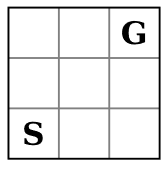

a. Implement **Q-learning** and **Double Q-learning** and apply them to this problem for 10,000 experiments using the learning rate $\alpha=\frac{1}{n(s,a)}$.

b. Plot the average reward per step vs. number of time steps averaged over 10,000 experiments. The length of an episode following the optimal policy is five actions, so the optimal average reward per step is +0.2. Plot this true value in your figure and see how close your algorithm gets to the true value.

c. Plot the maximal action value in the starting state $S$ (i.e. $max_a Q(s,a)$) averaged over 10,000 experiments. The optimal value of maximally valued action in the starting state is $5\gamma^4 - \sum_{k=0}^3 \approx 0.36$. Plot this true value in your figure and see how close your algorithm gets to the true value.

d. Repeat the experiments with $\alpha = \frac{1}{n(s,a)^{0.8}}$ and redo steps b and c.


**Note:** You should have four figures (average rewards and maximal action values for different learning rates, $2 \times 2$). 


In [ ]:
# Your code here

Answer the following questions:

a.	Which algorithm finds a better policy? Why?
> Answer 

b.	b.	Which learning rate performs better? 
> Answer